# Parameters

In [1]:
datasets = ['codex-m', 'wnrr', 'fb15k-237', 'wn18']
symbolic_models = [('anyburl', 'AnyBURL')]
subsymbolic_models = [('complex', 'ComplEx')]

bp_threshold = 5
relation_class_threshold = 0.7

# Imports

In [2]:
%run utils.ipynb
%run graphs.ipynb
%run format_predictions.ipynb

from matplotlib.backends.backend_pdf import PdfPages
import os
import pandas as pd

# Analysis

Working on codex-m - AnyBURL - ComplEx


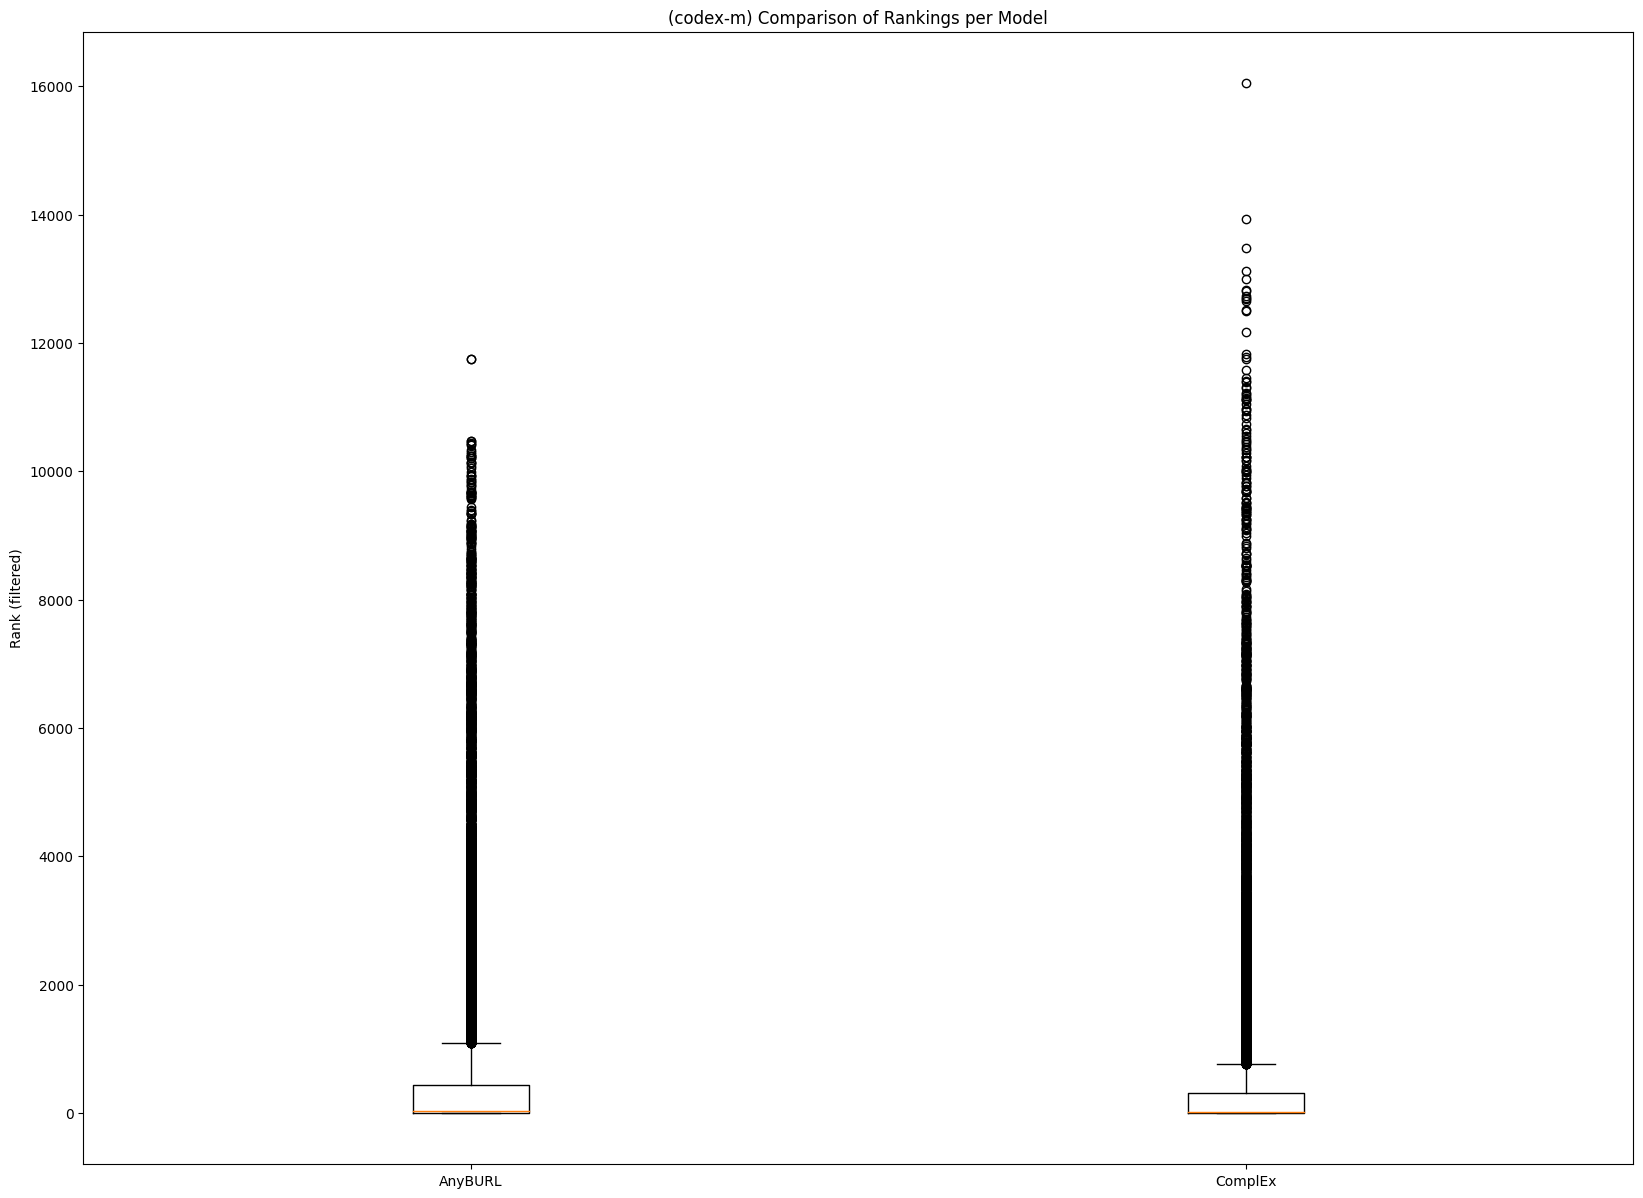

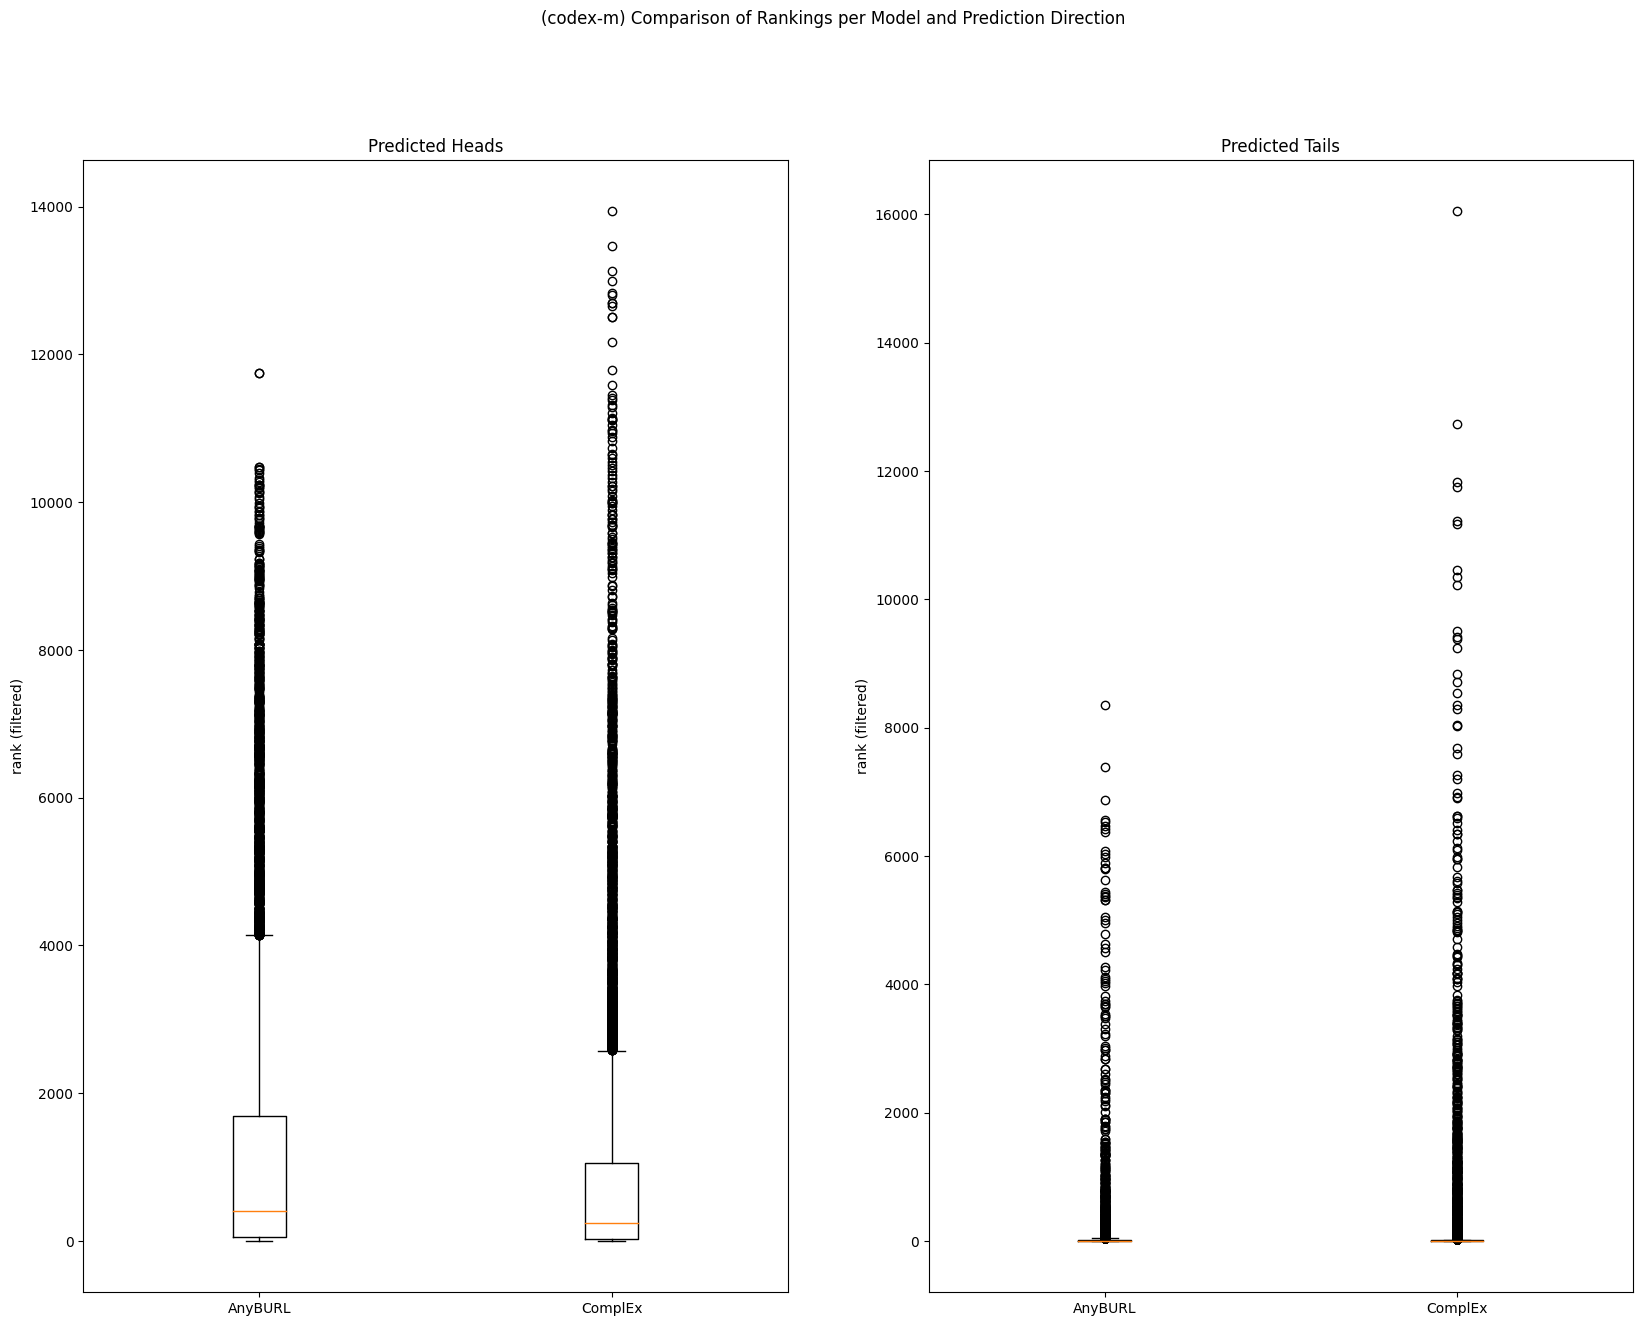

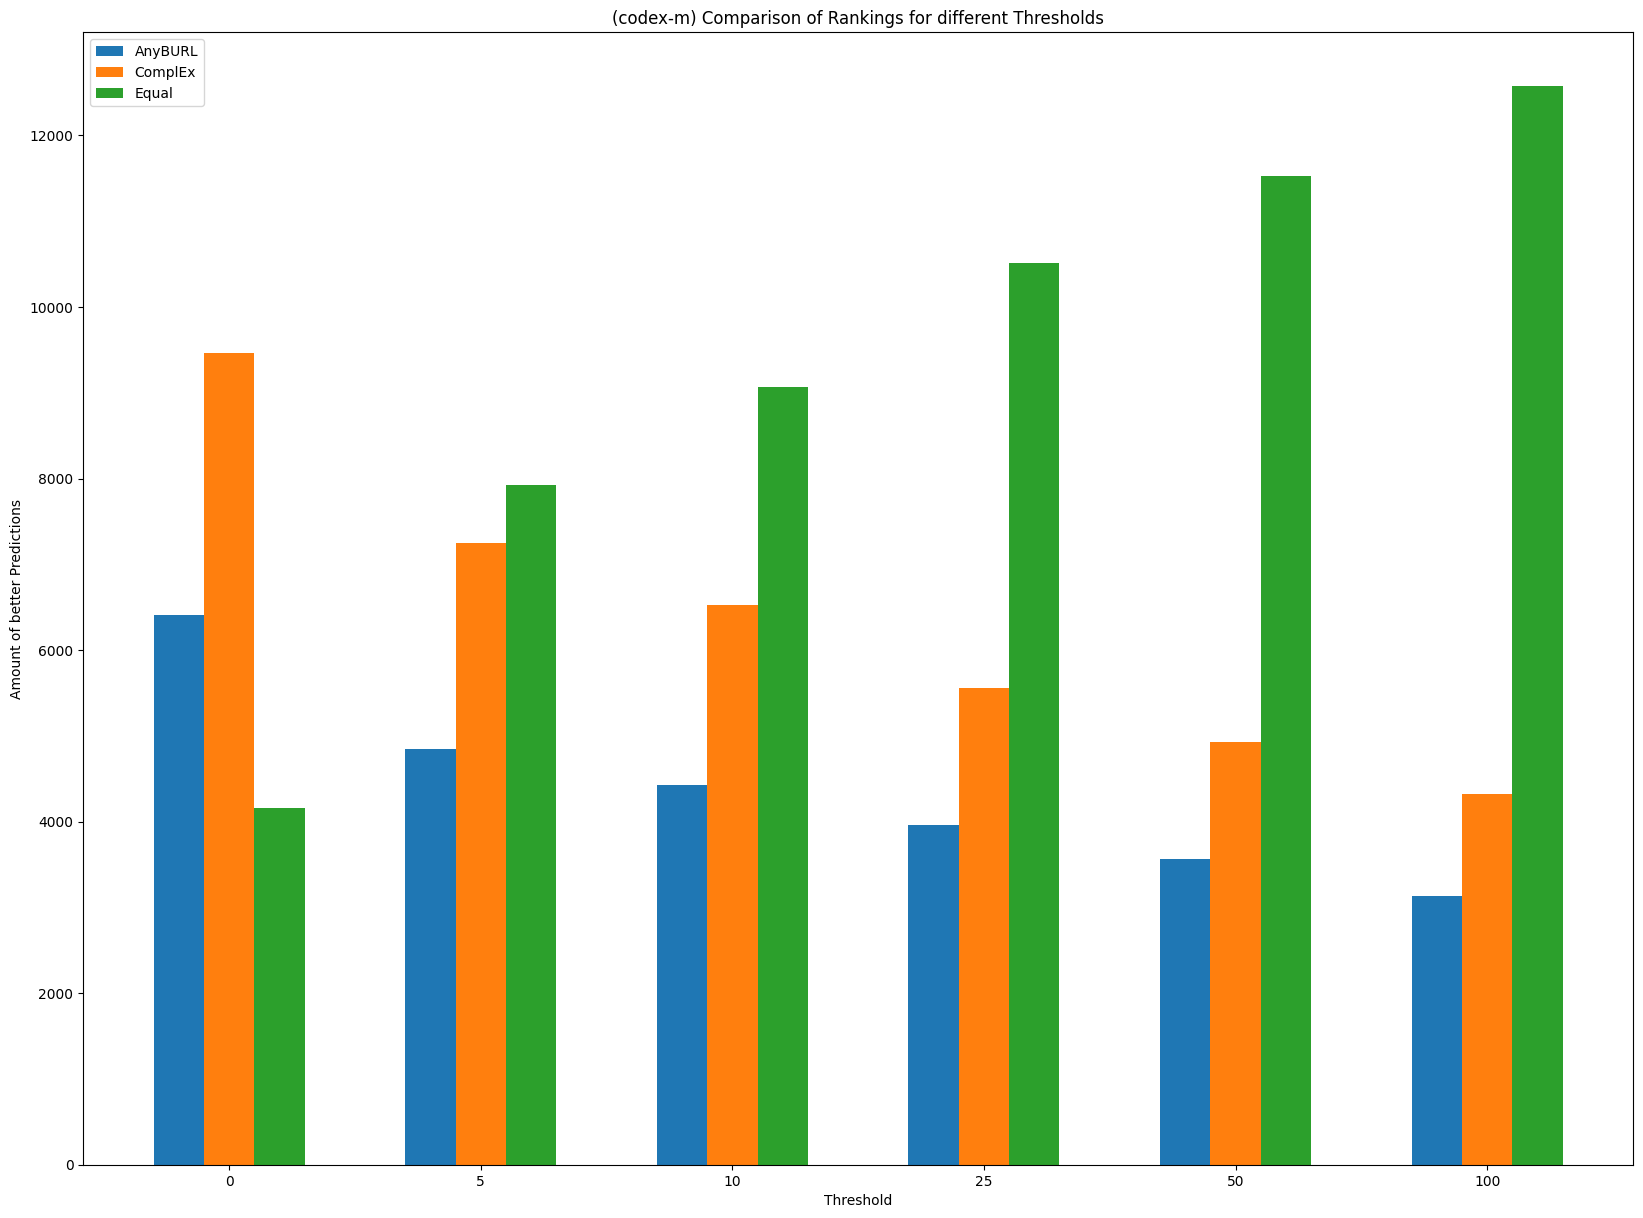

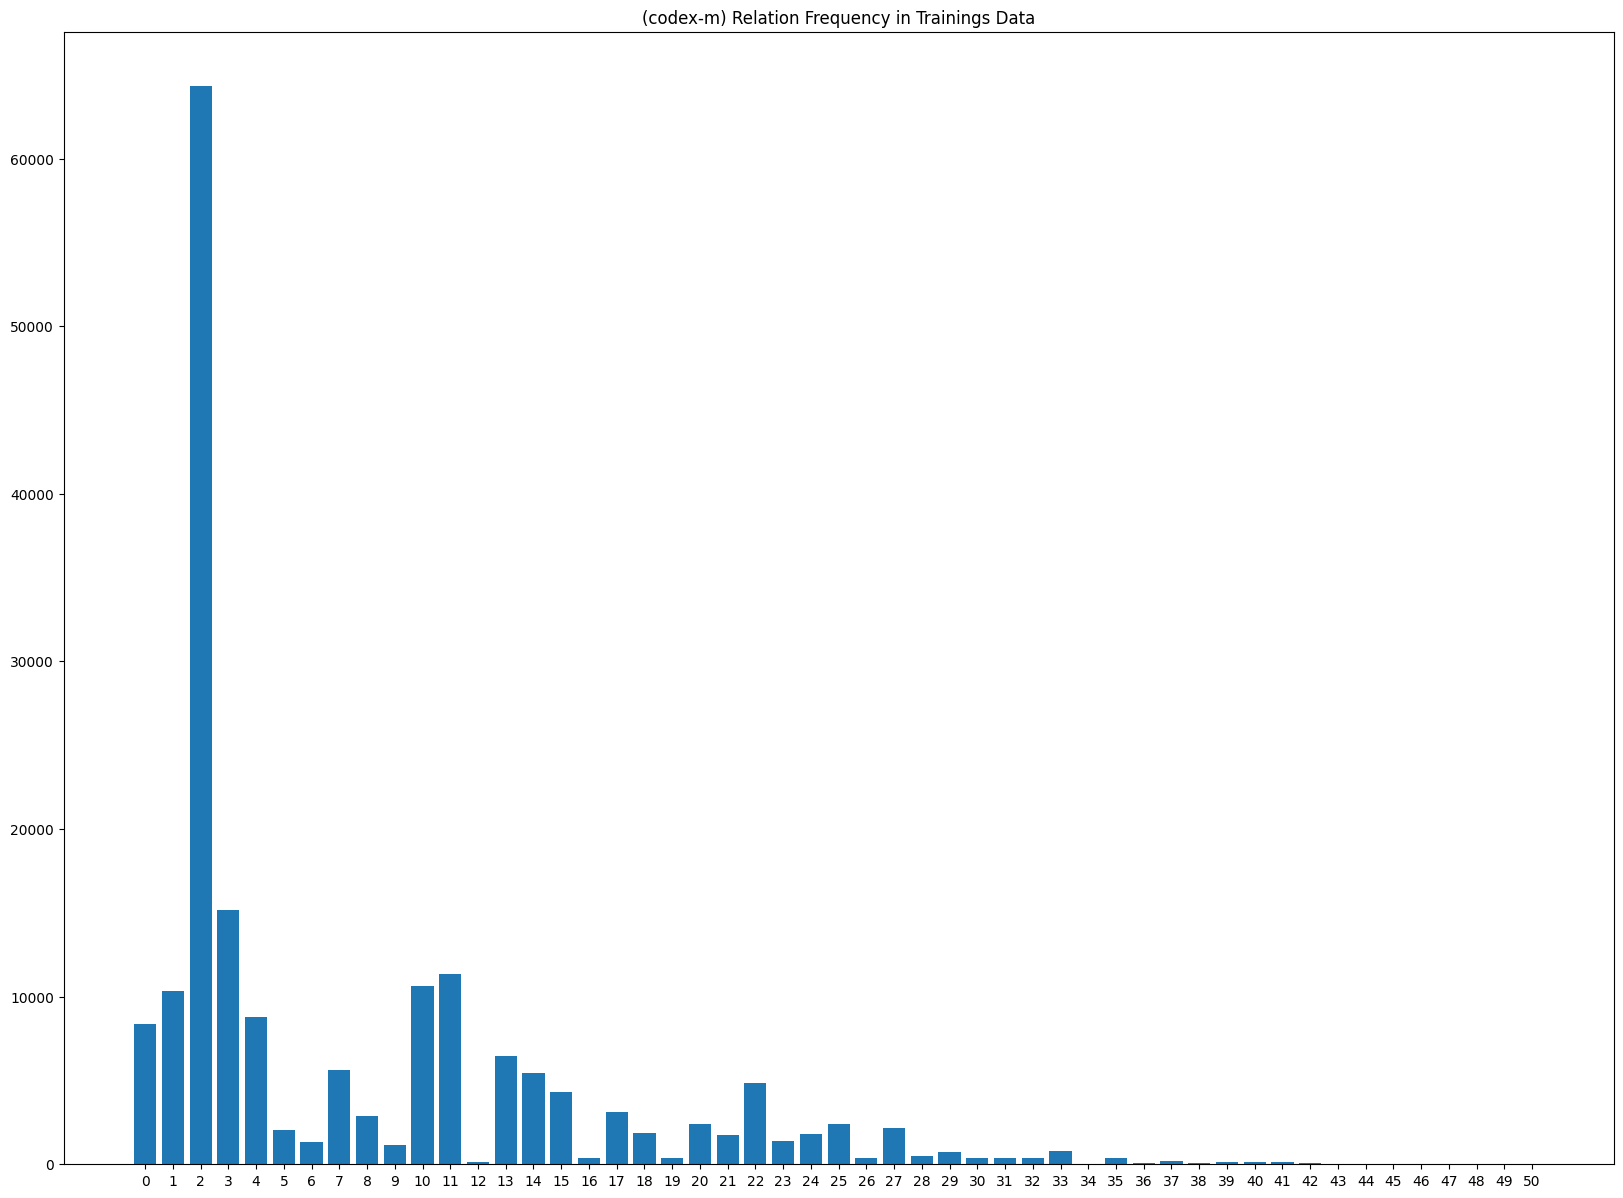

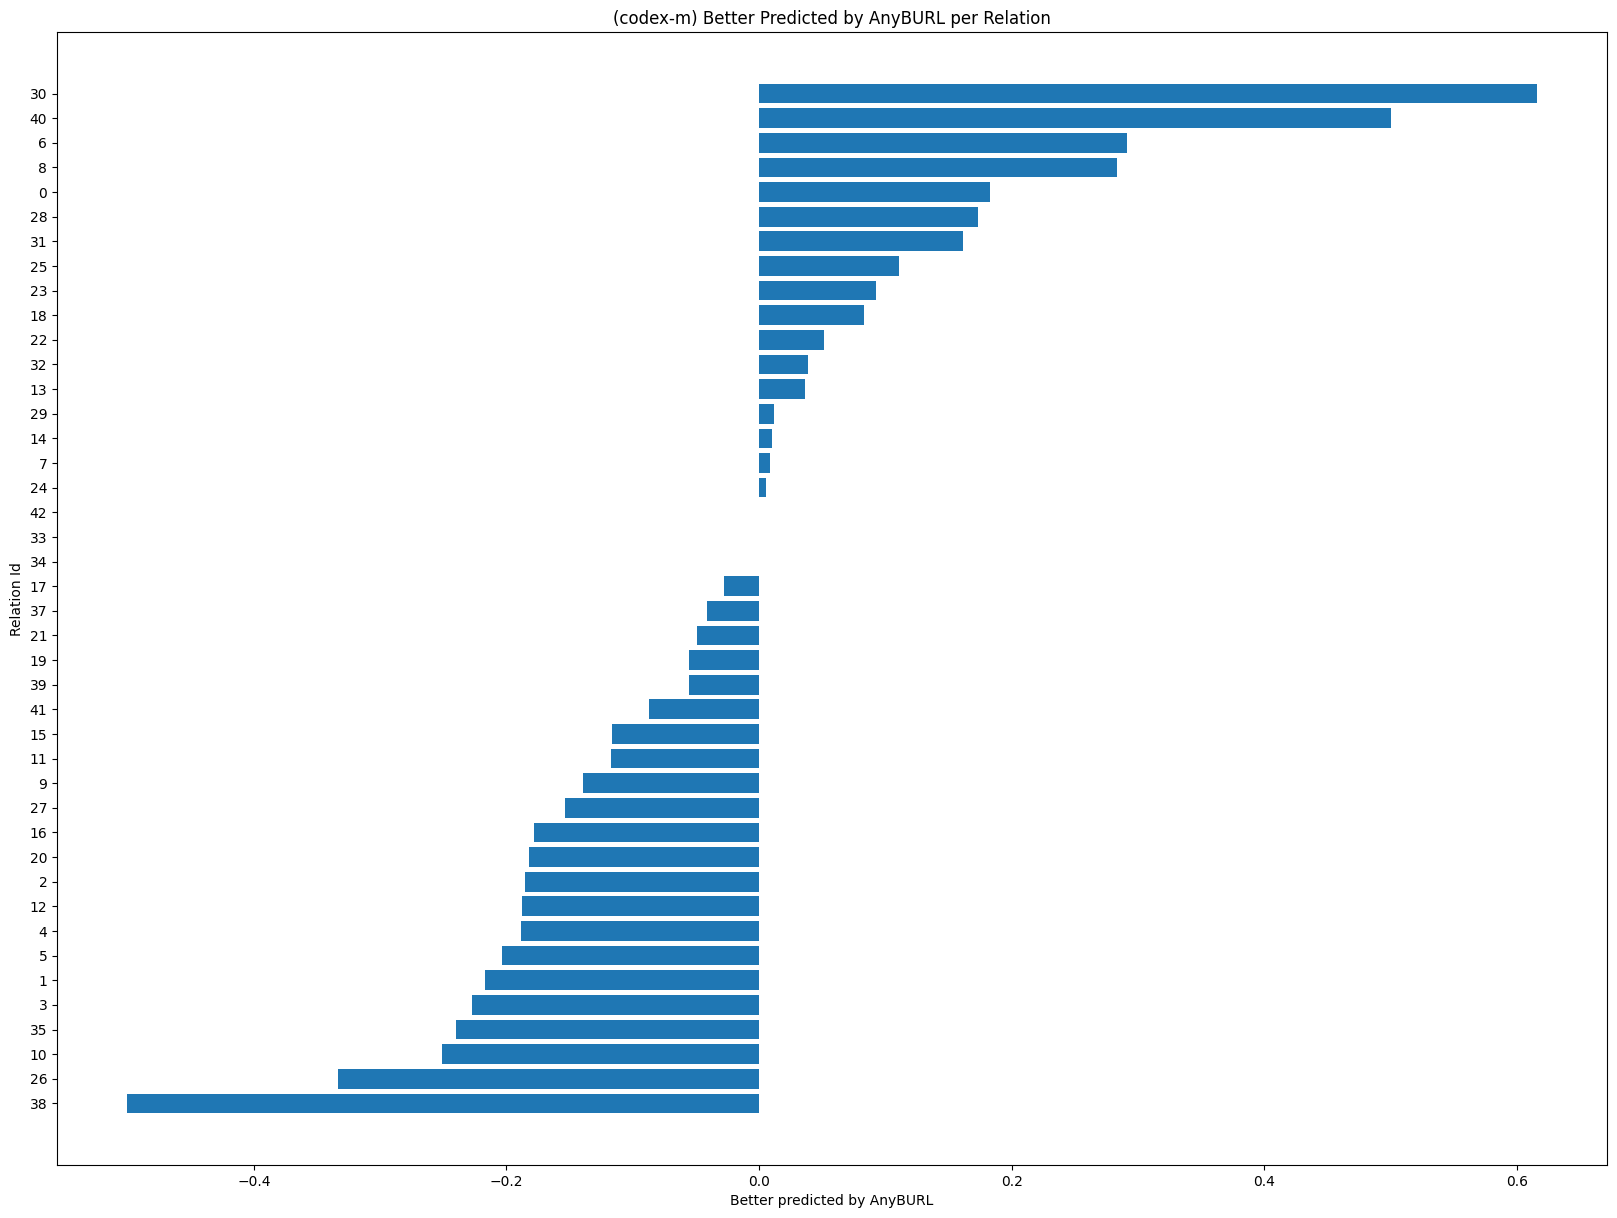

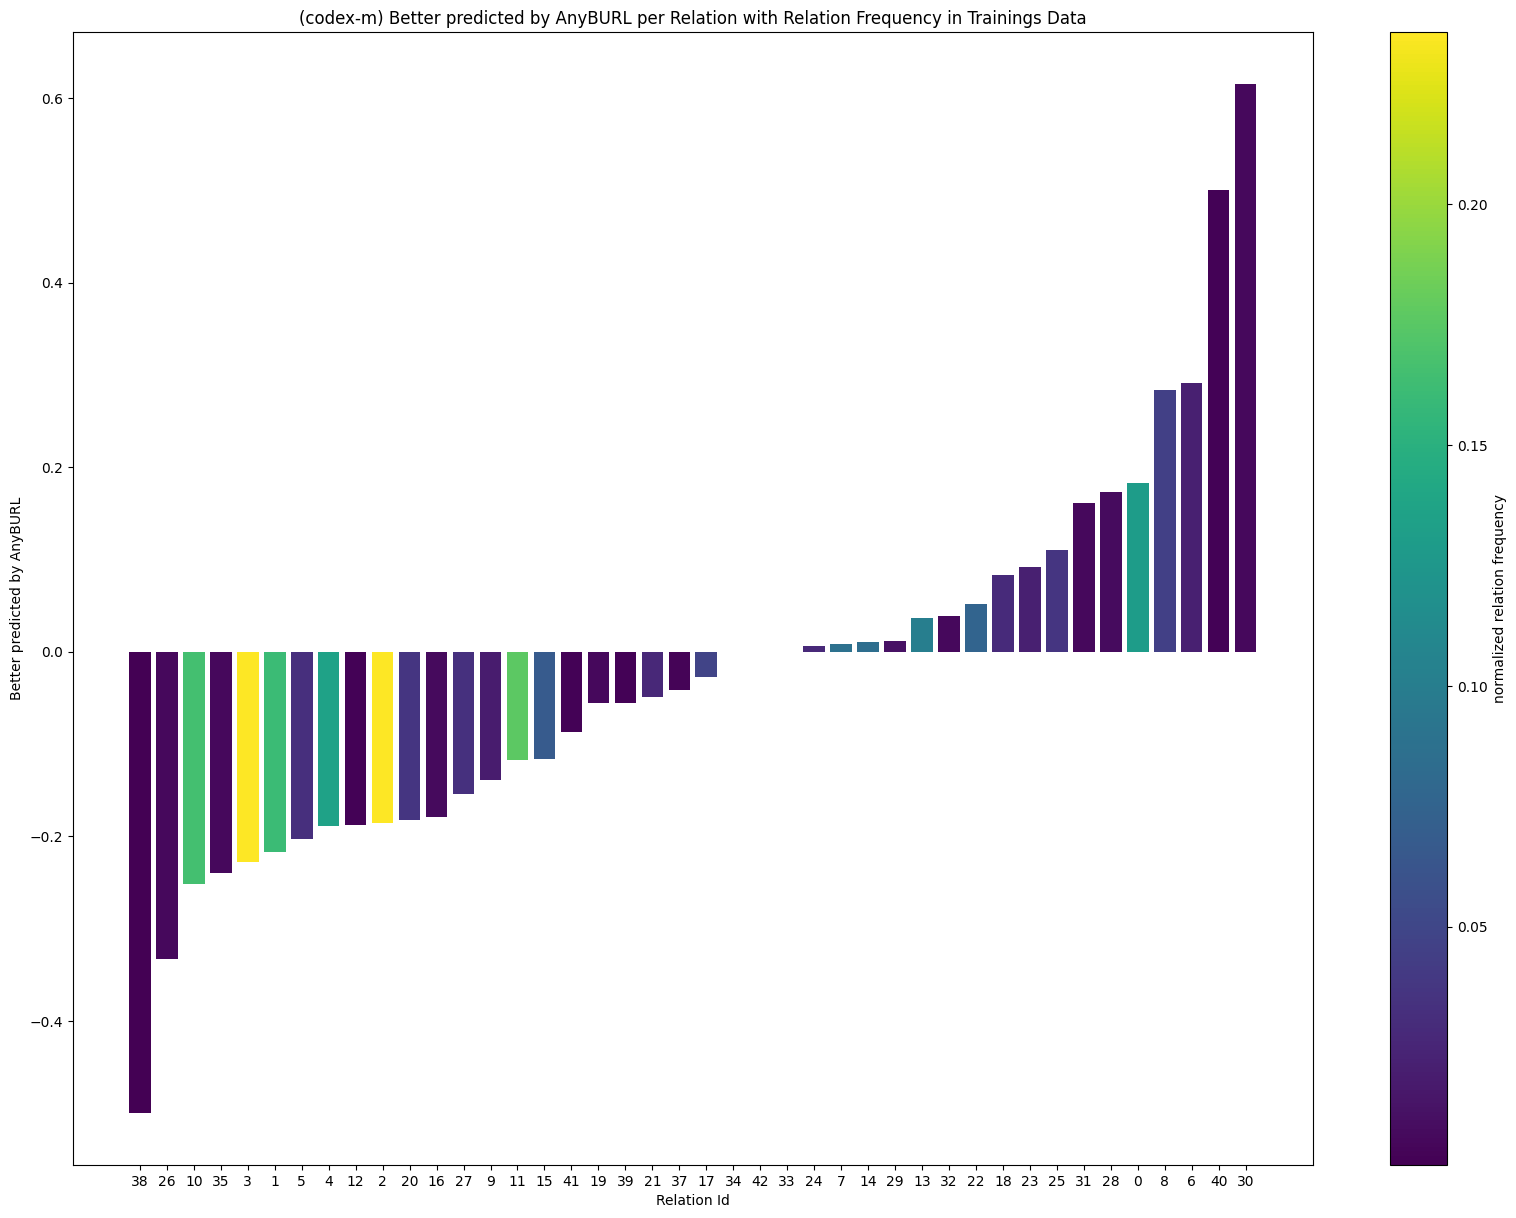

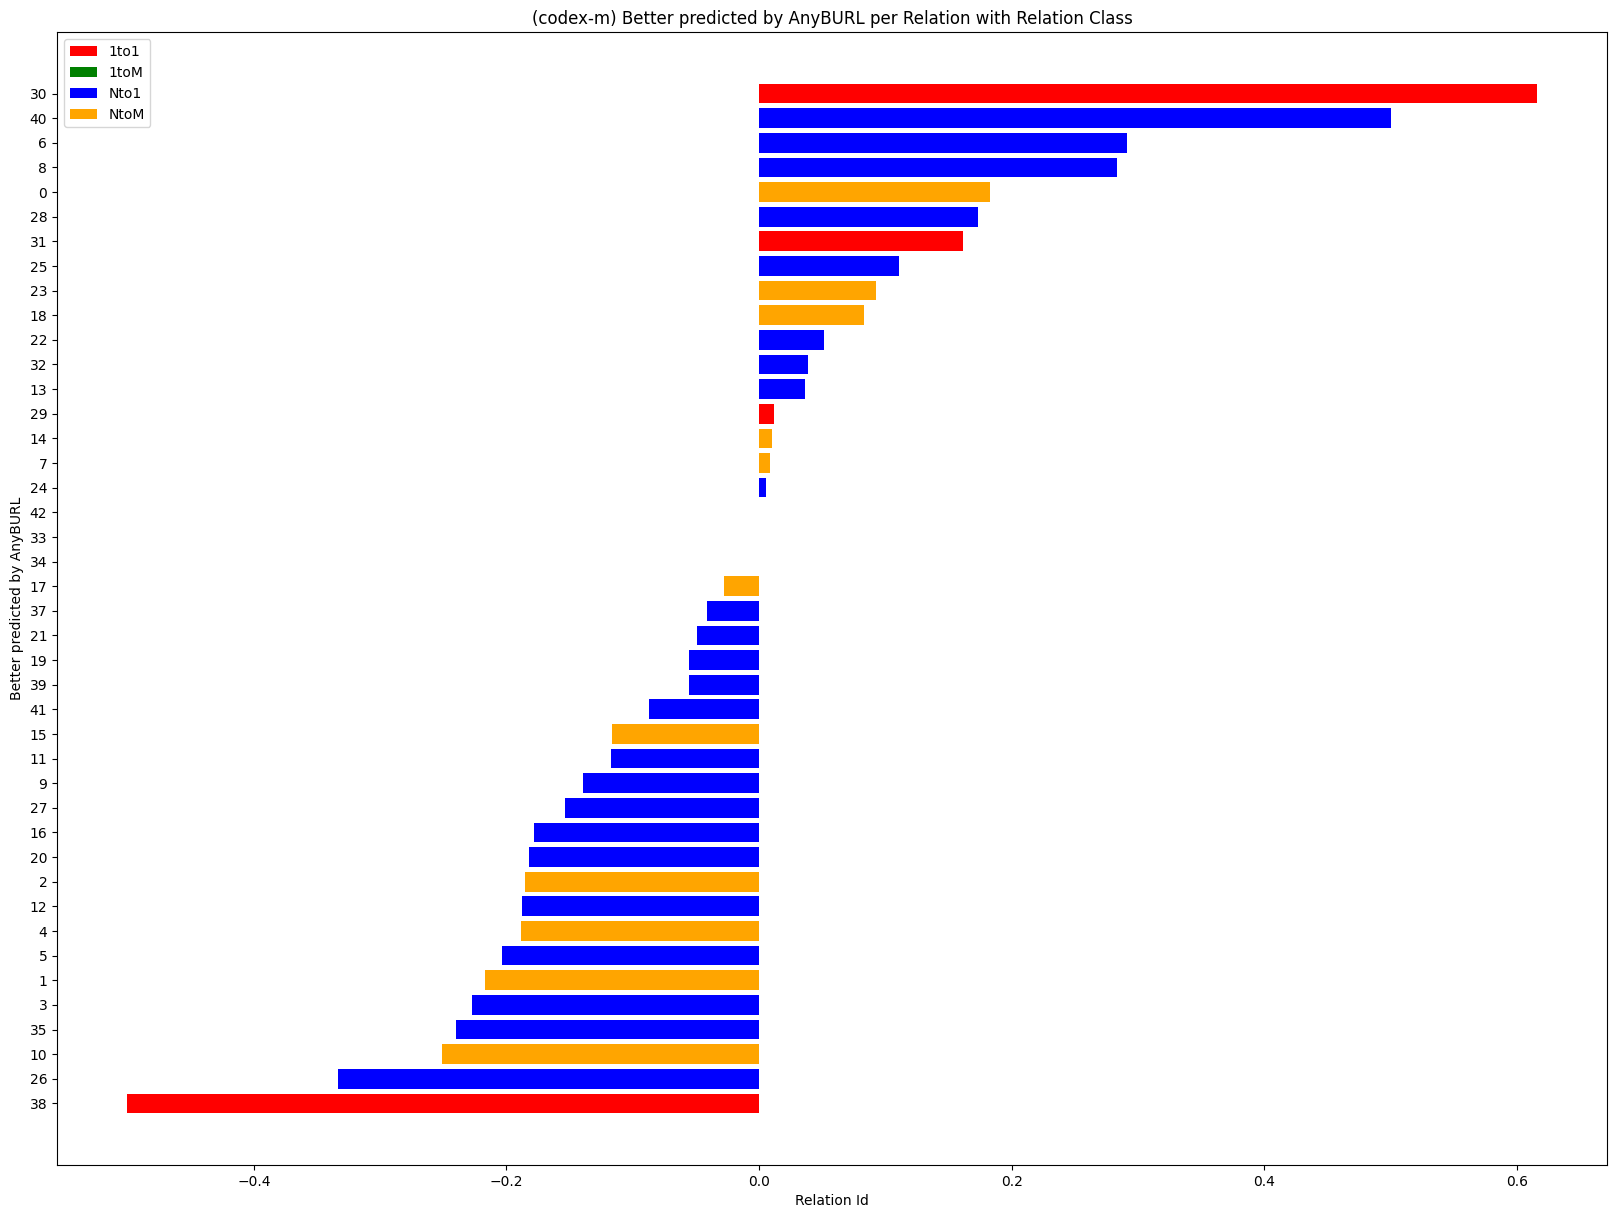

Working on wnrr - AnyBURL - ComplEx


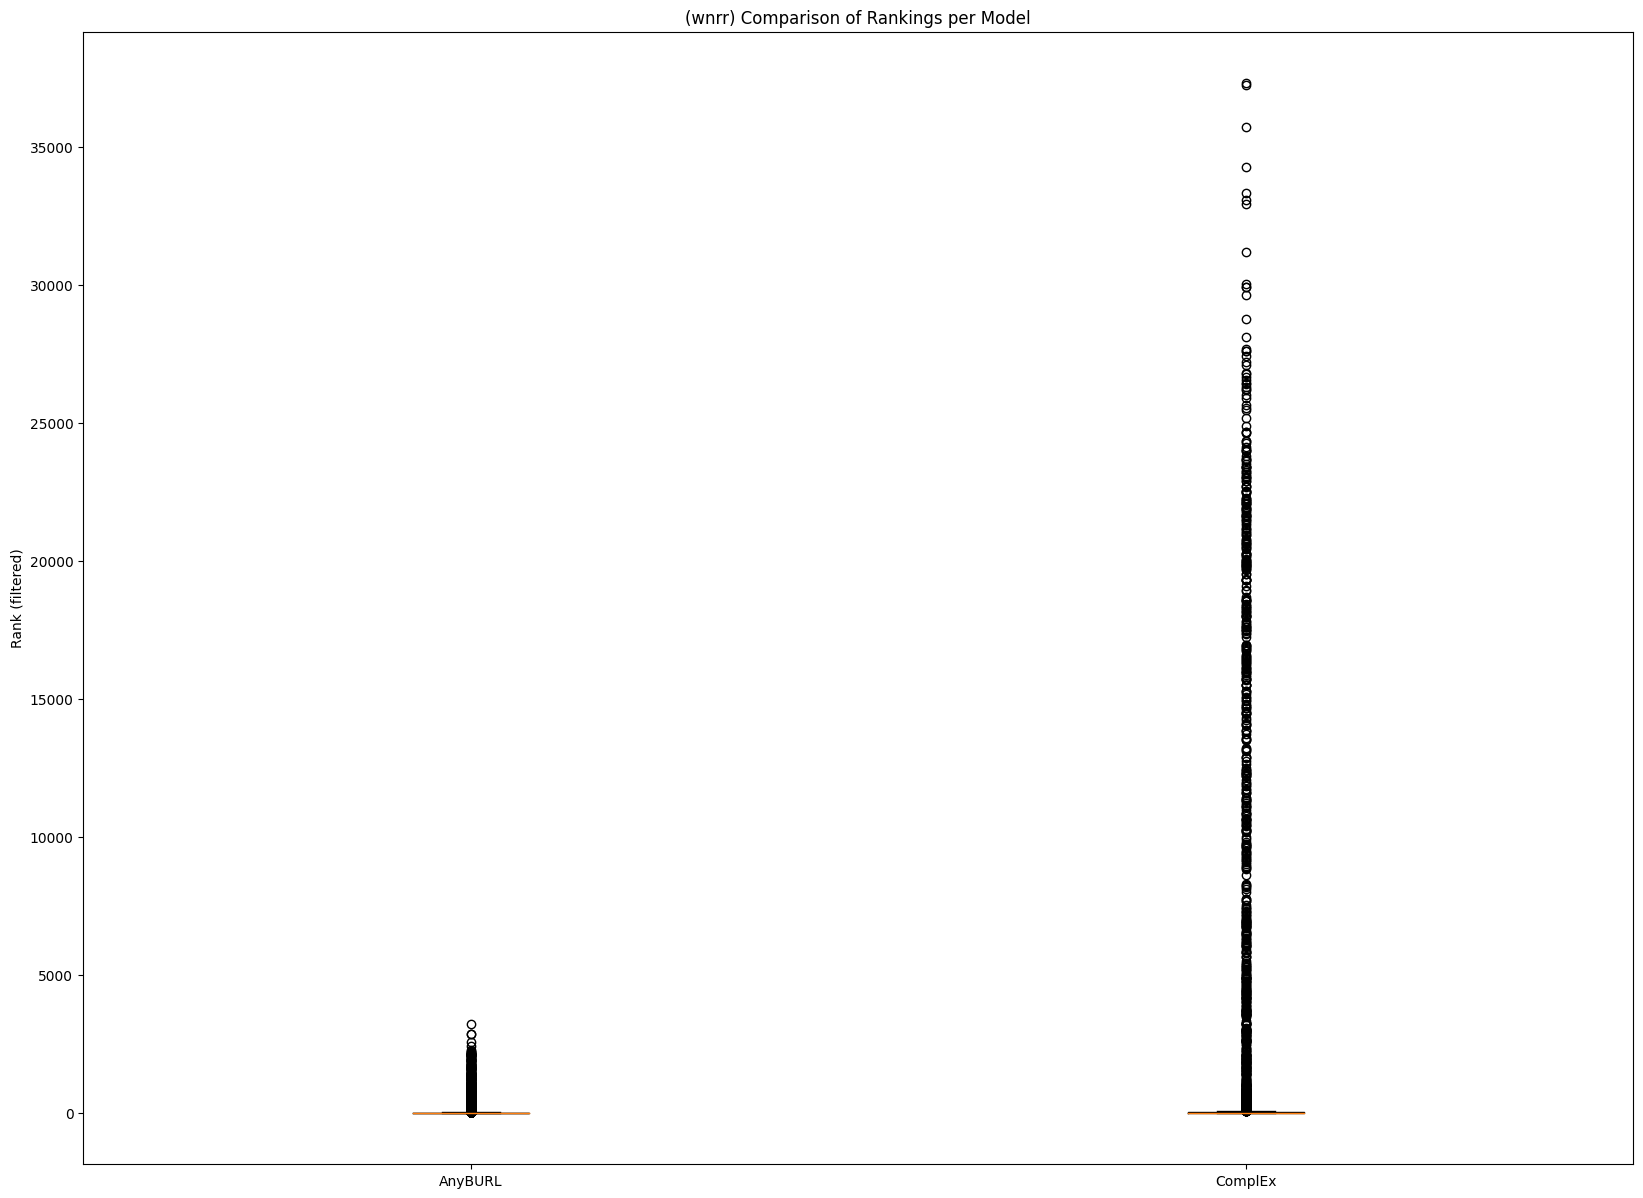

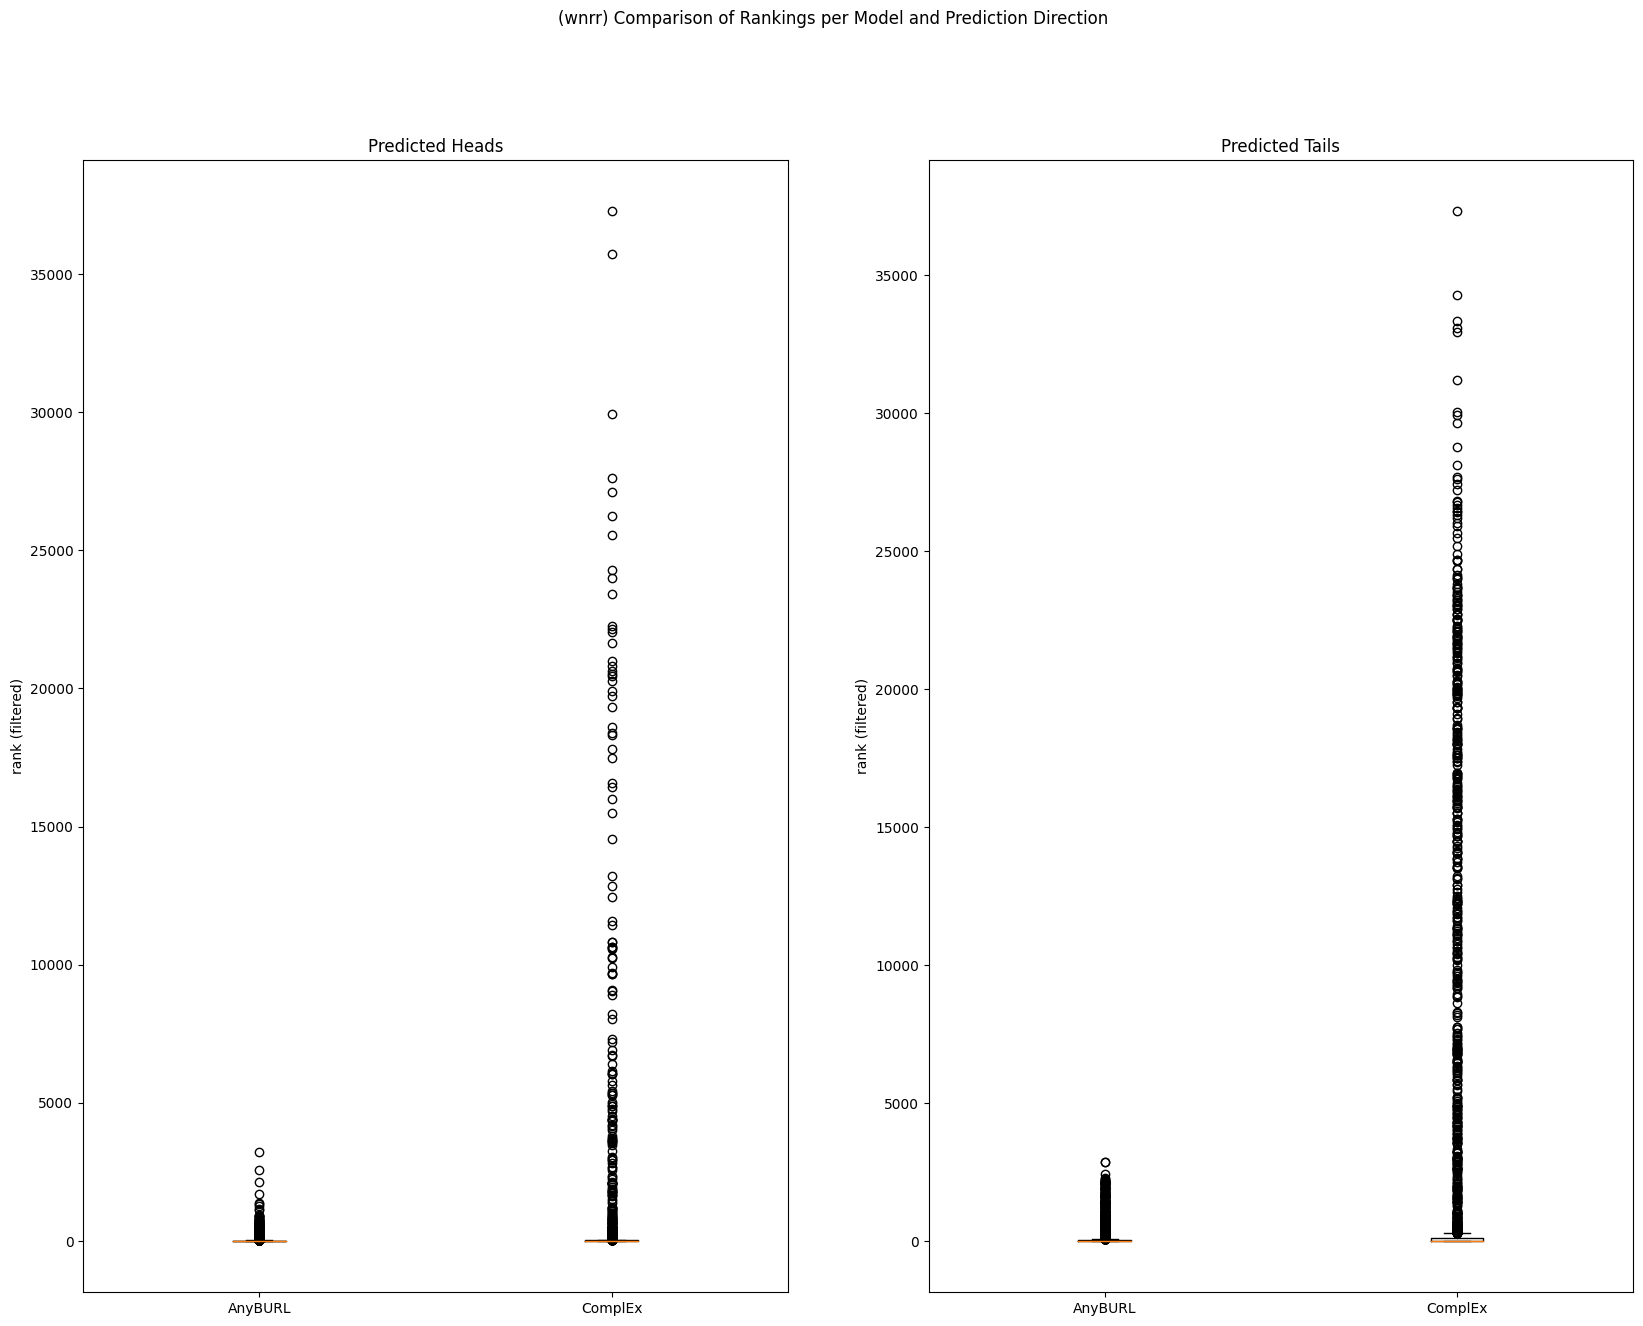

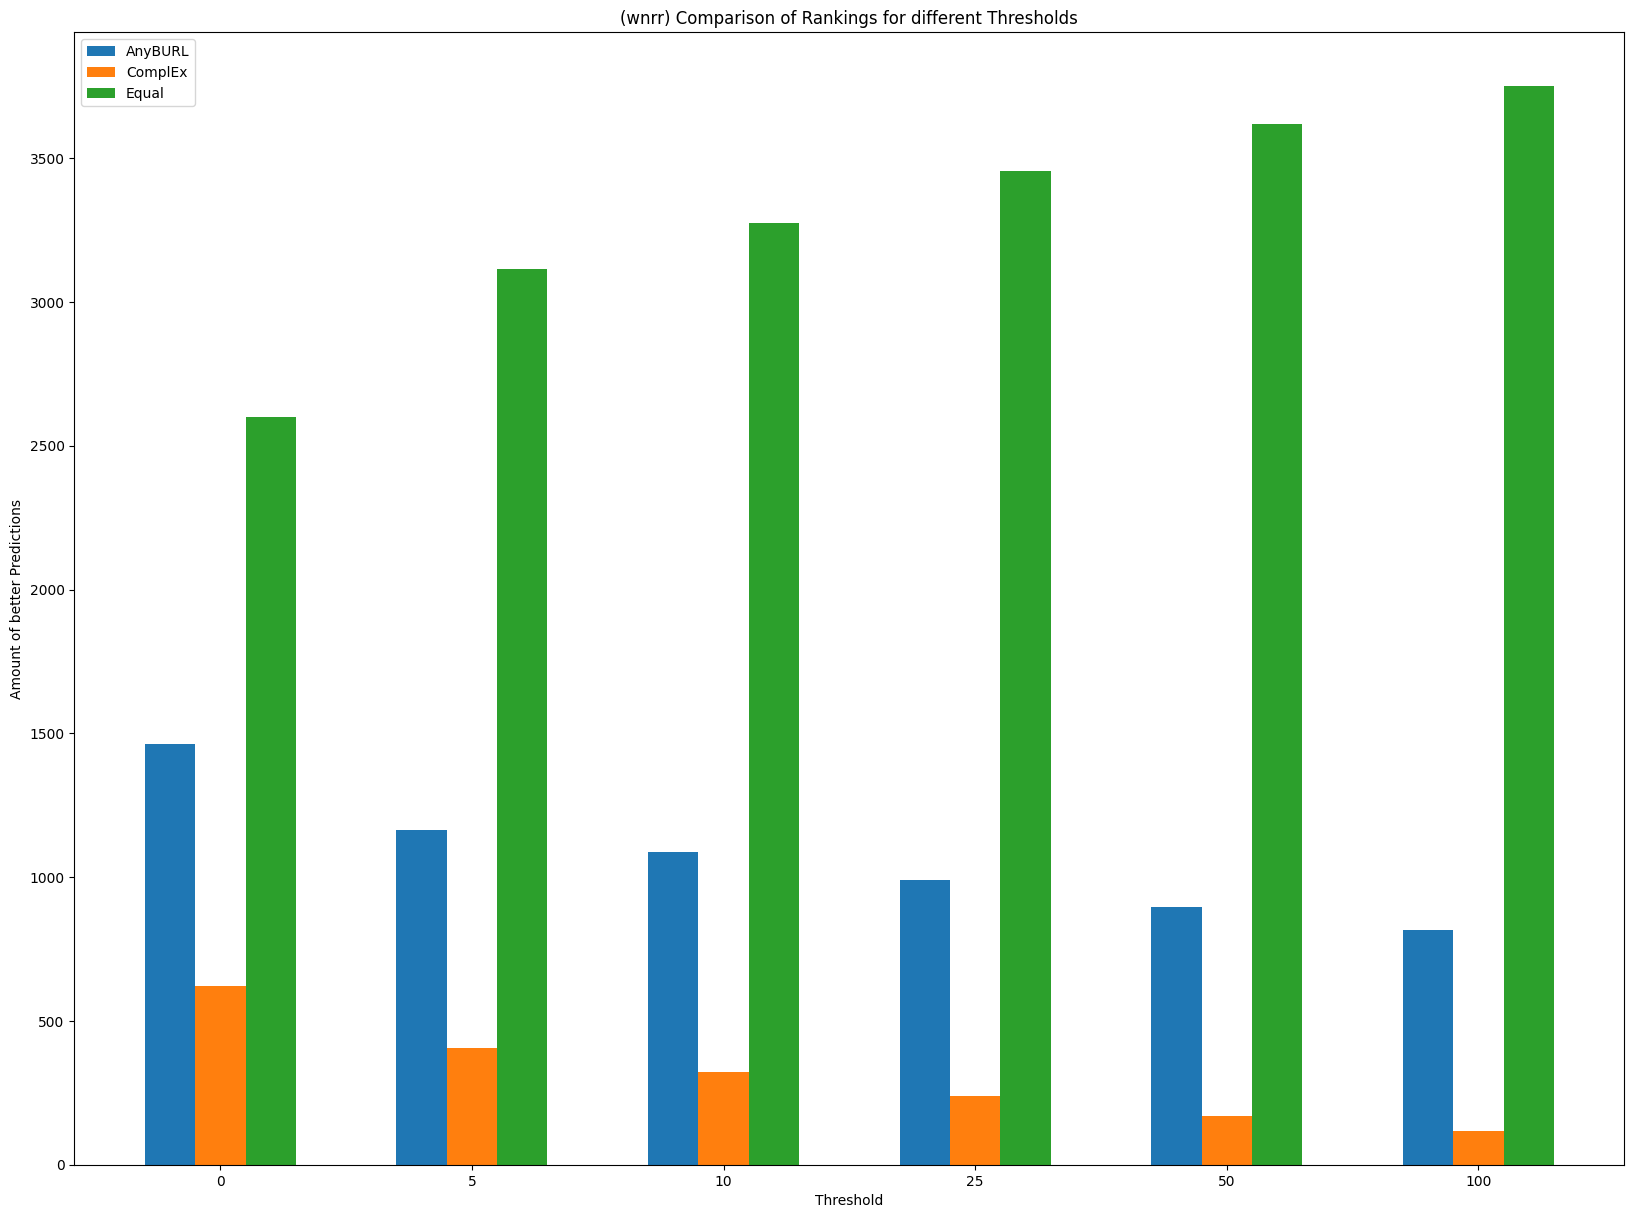

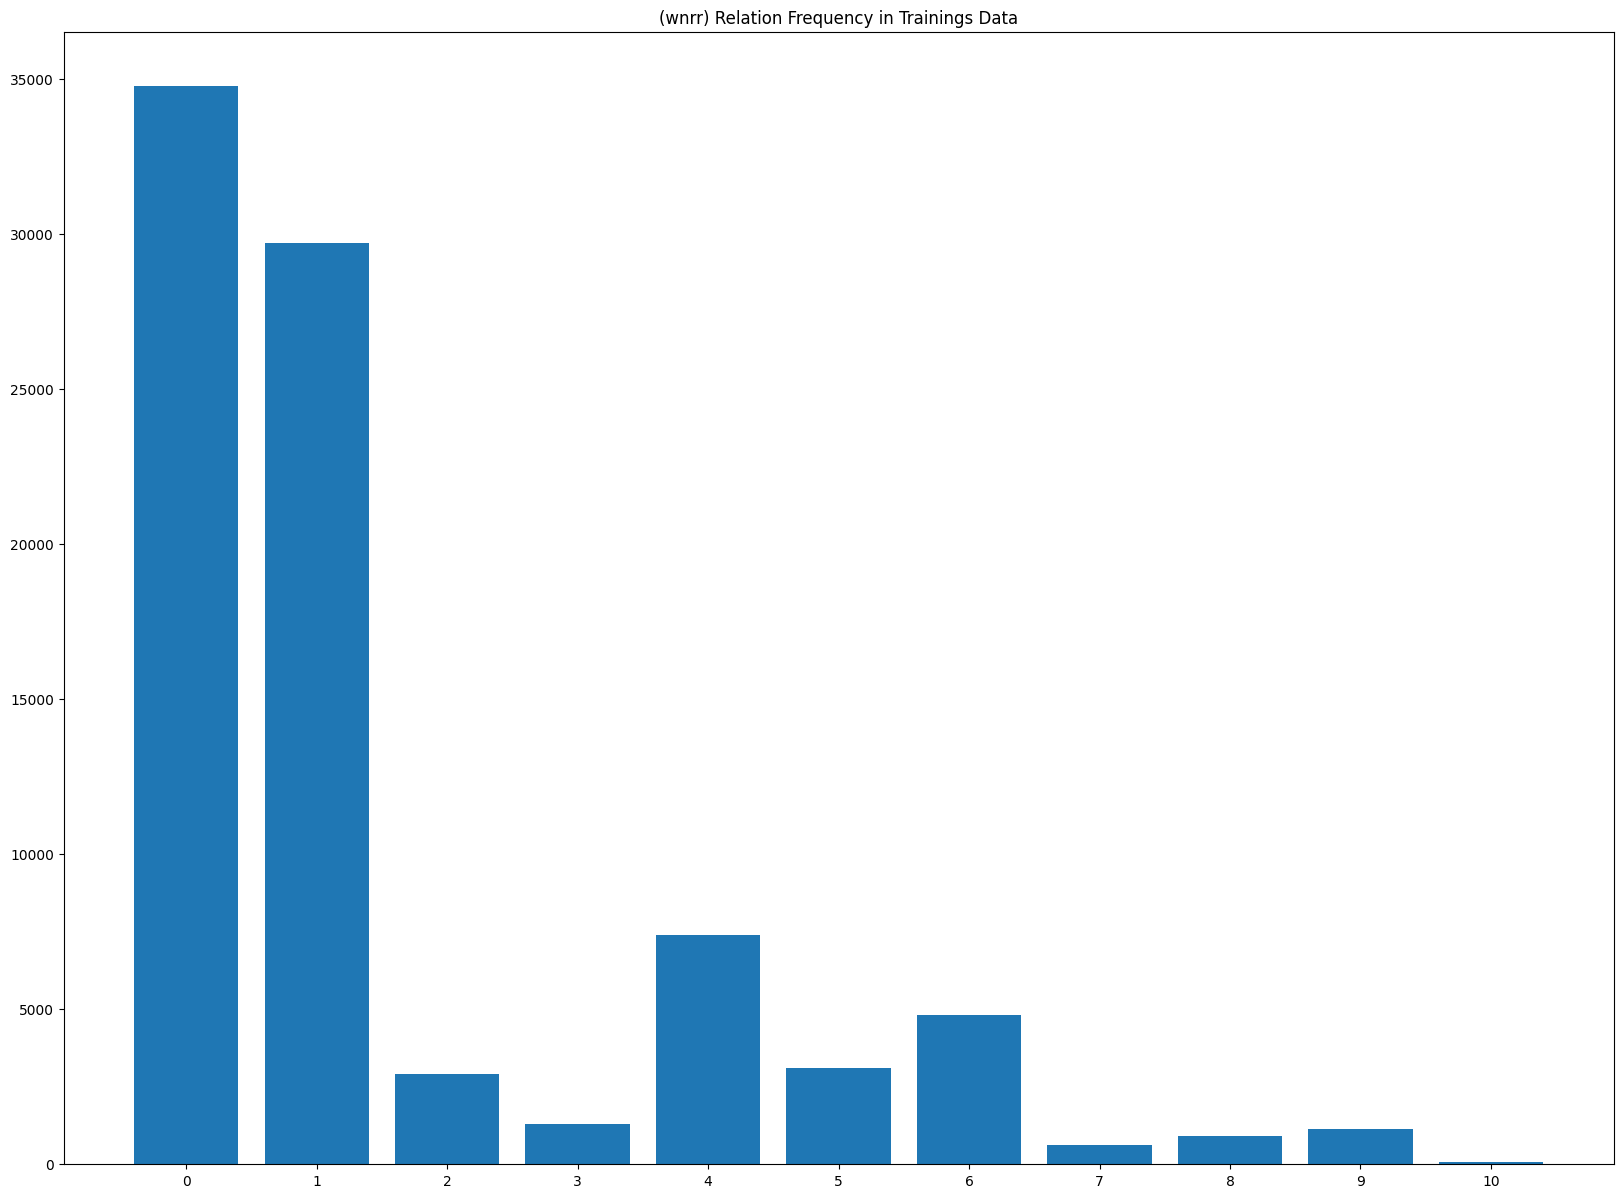

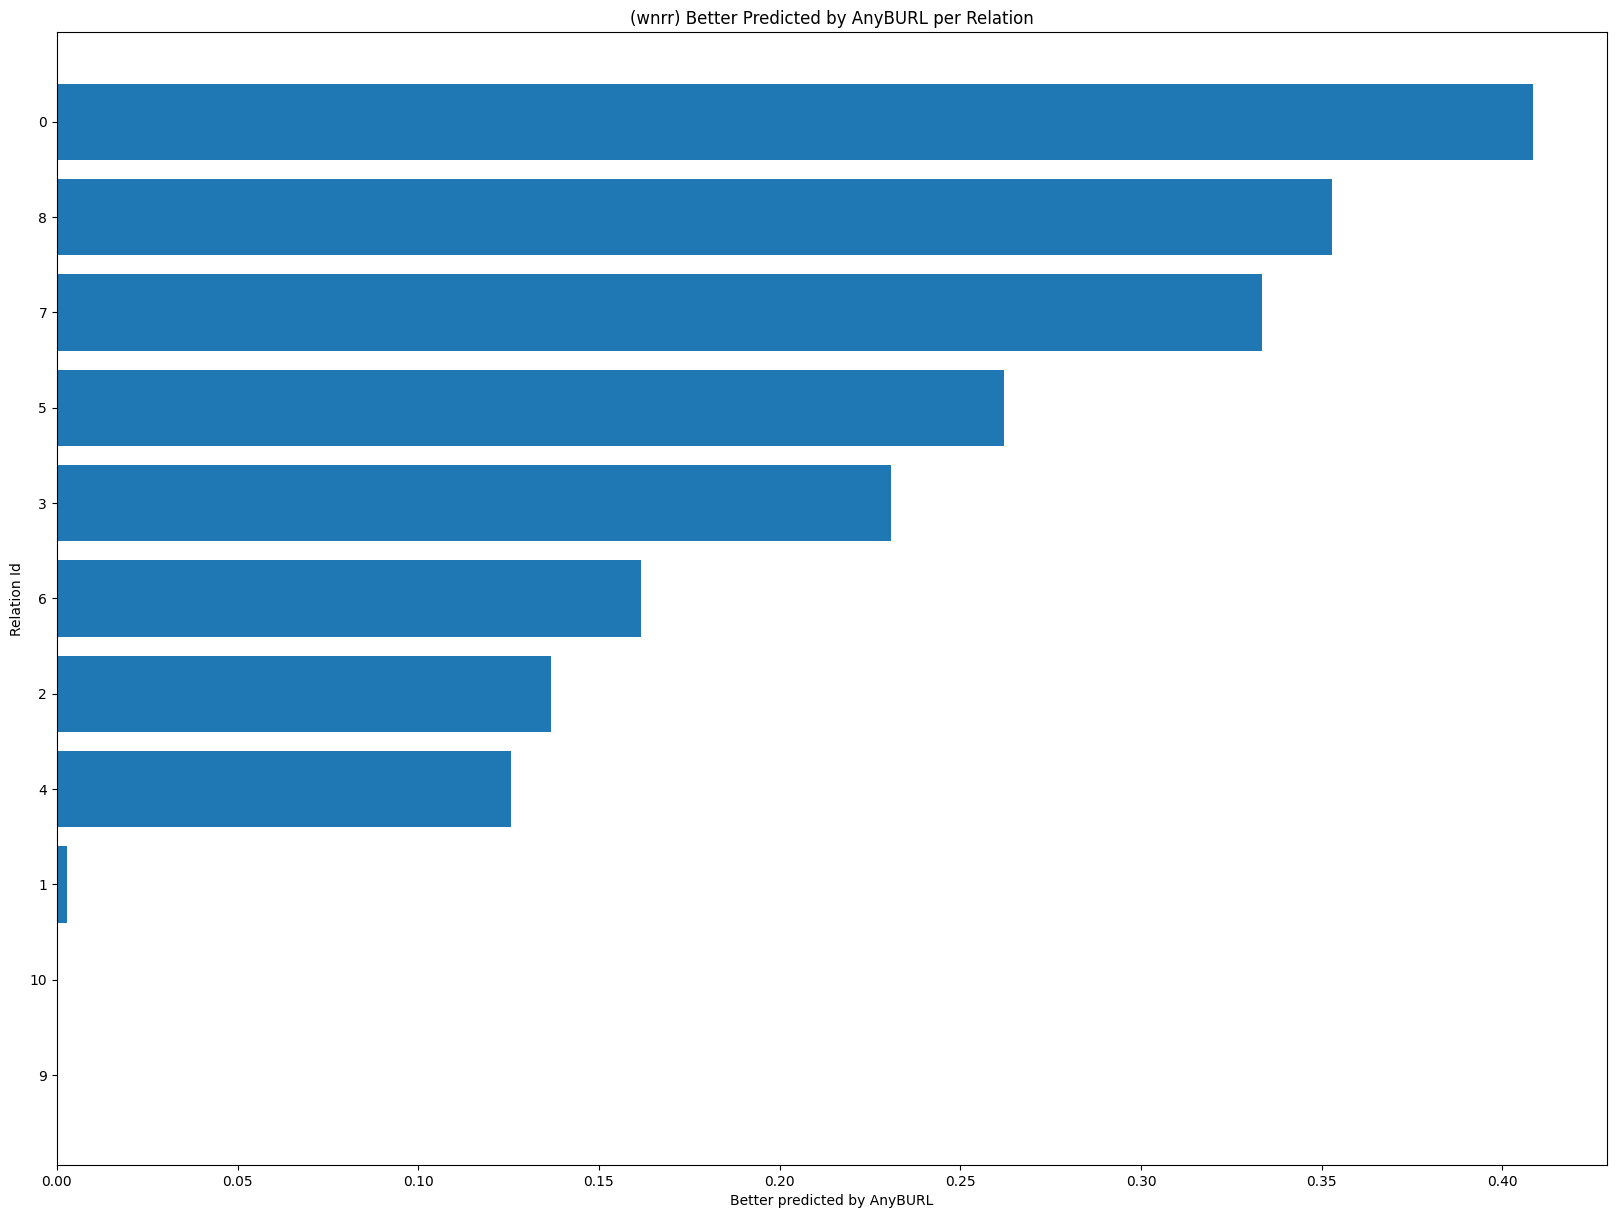

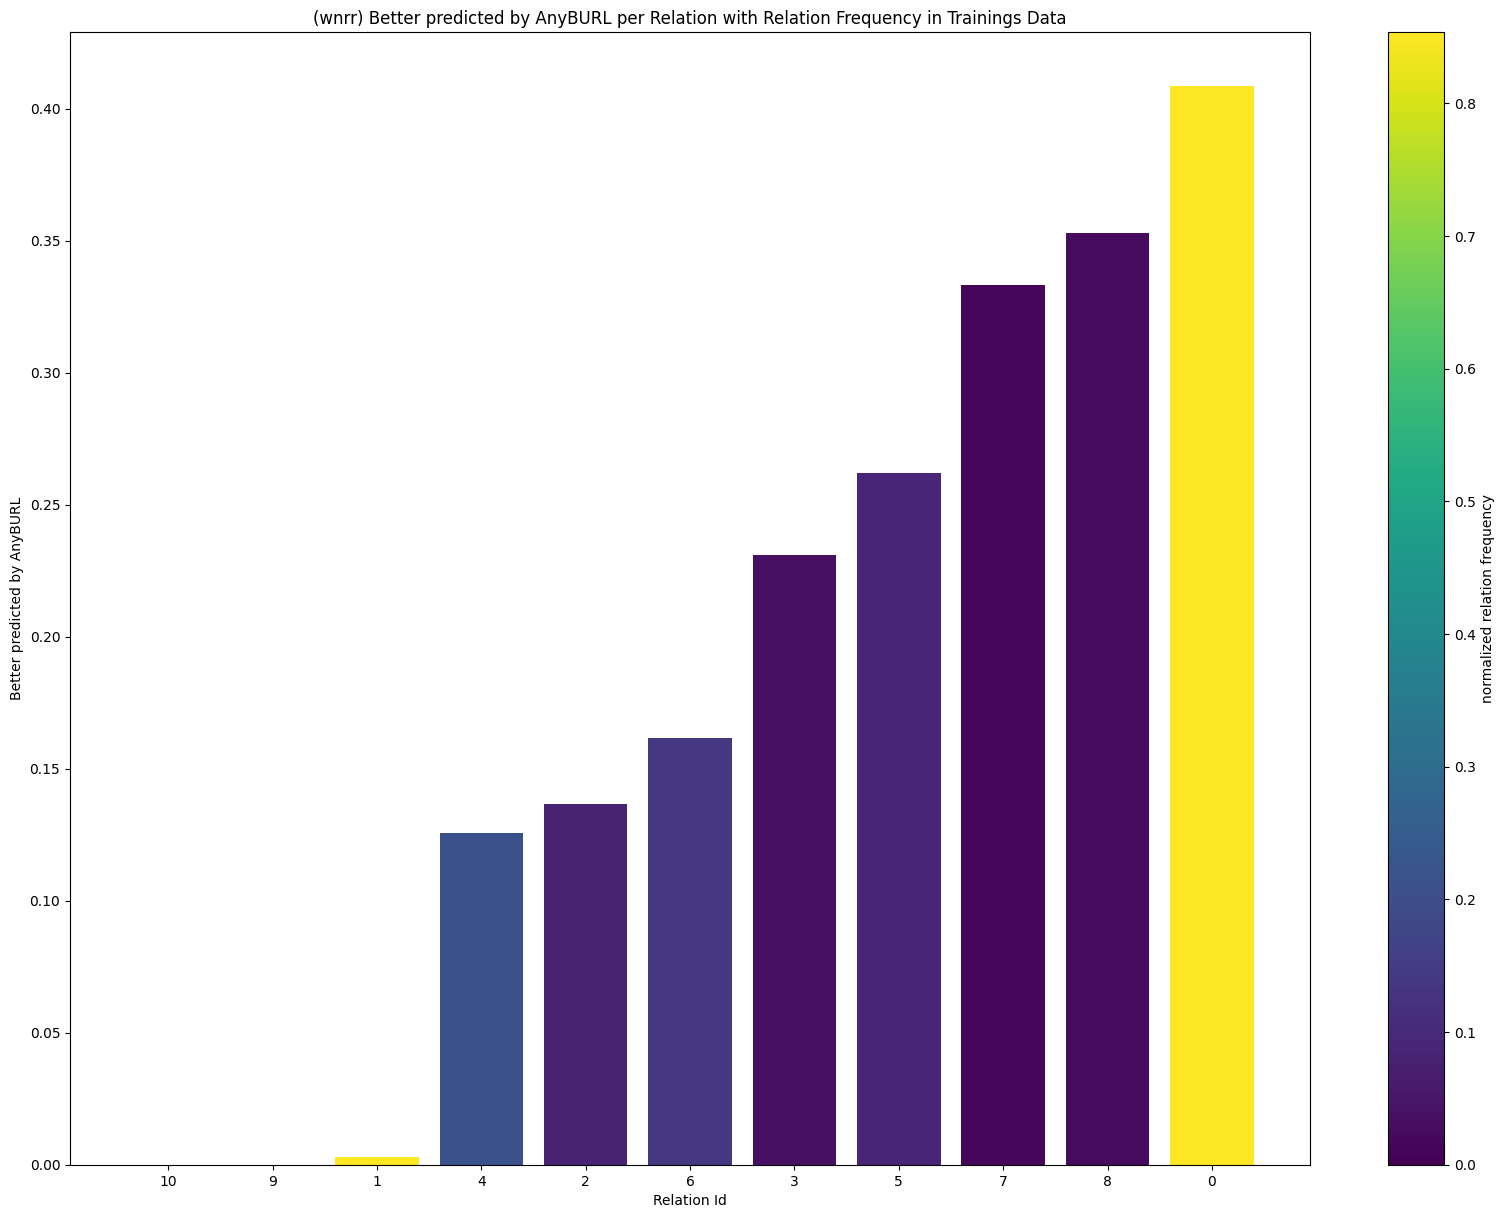

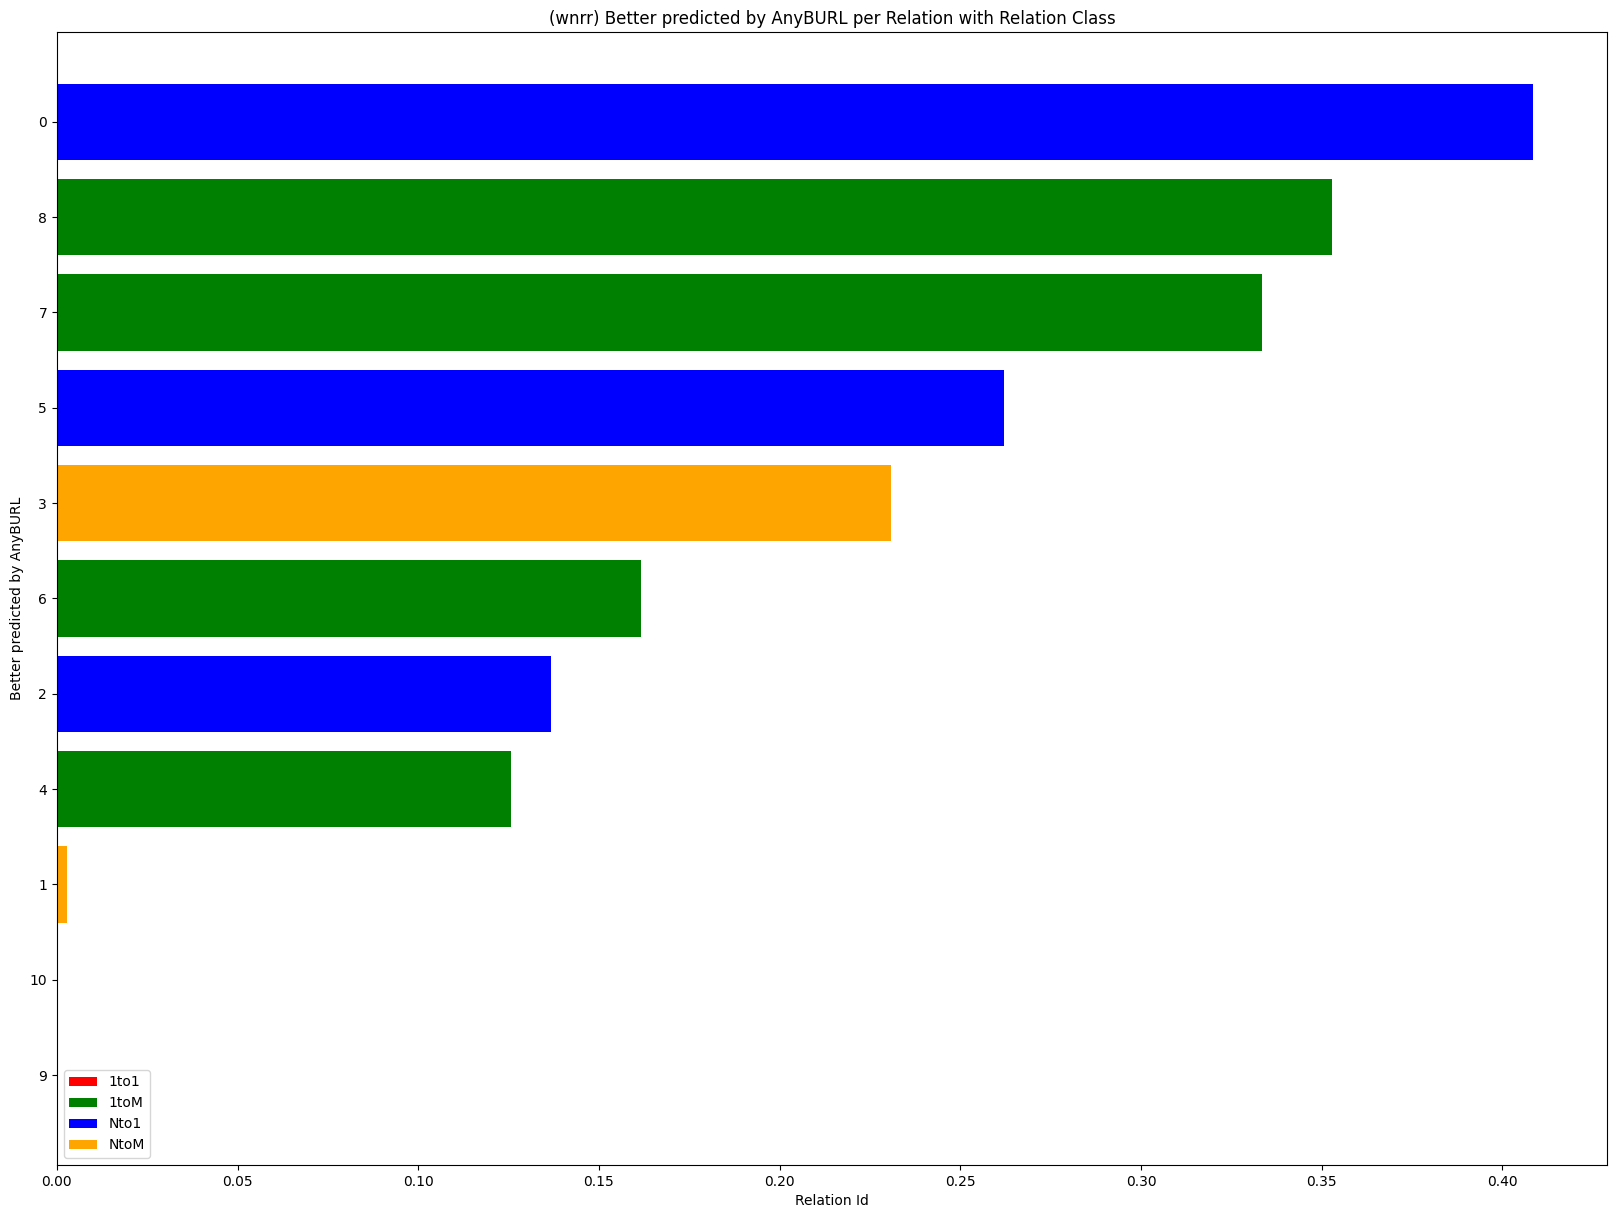

Working on fb15k-237 - AnyBURL - ComplEx


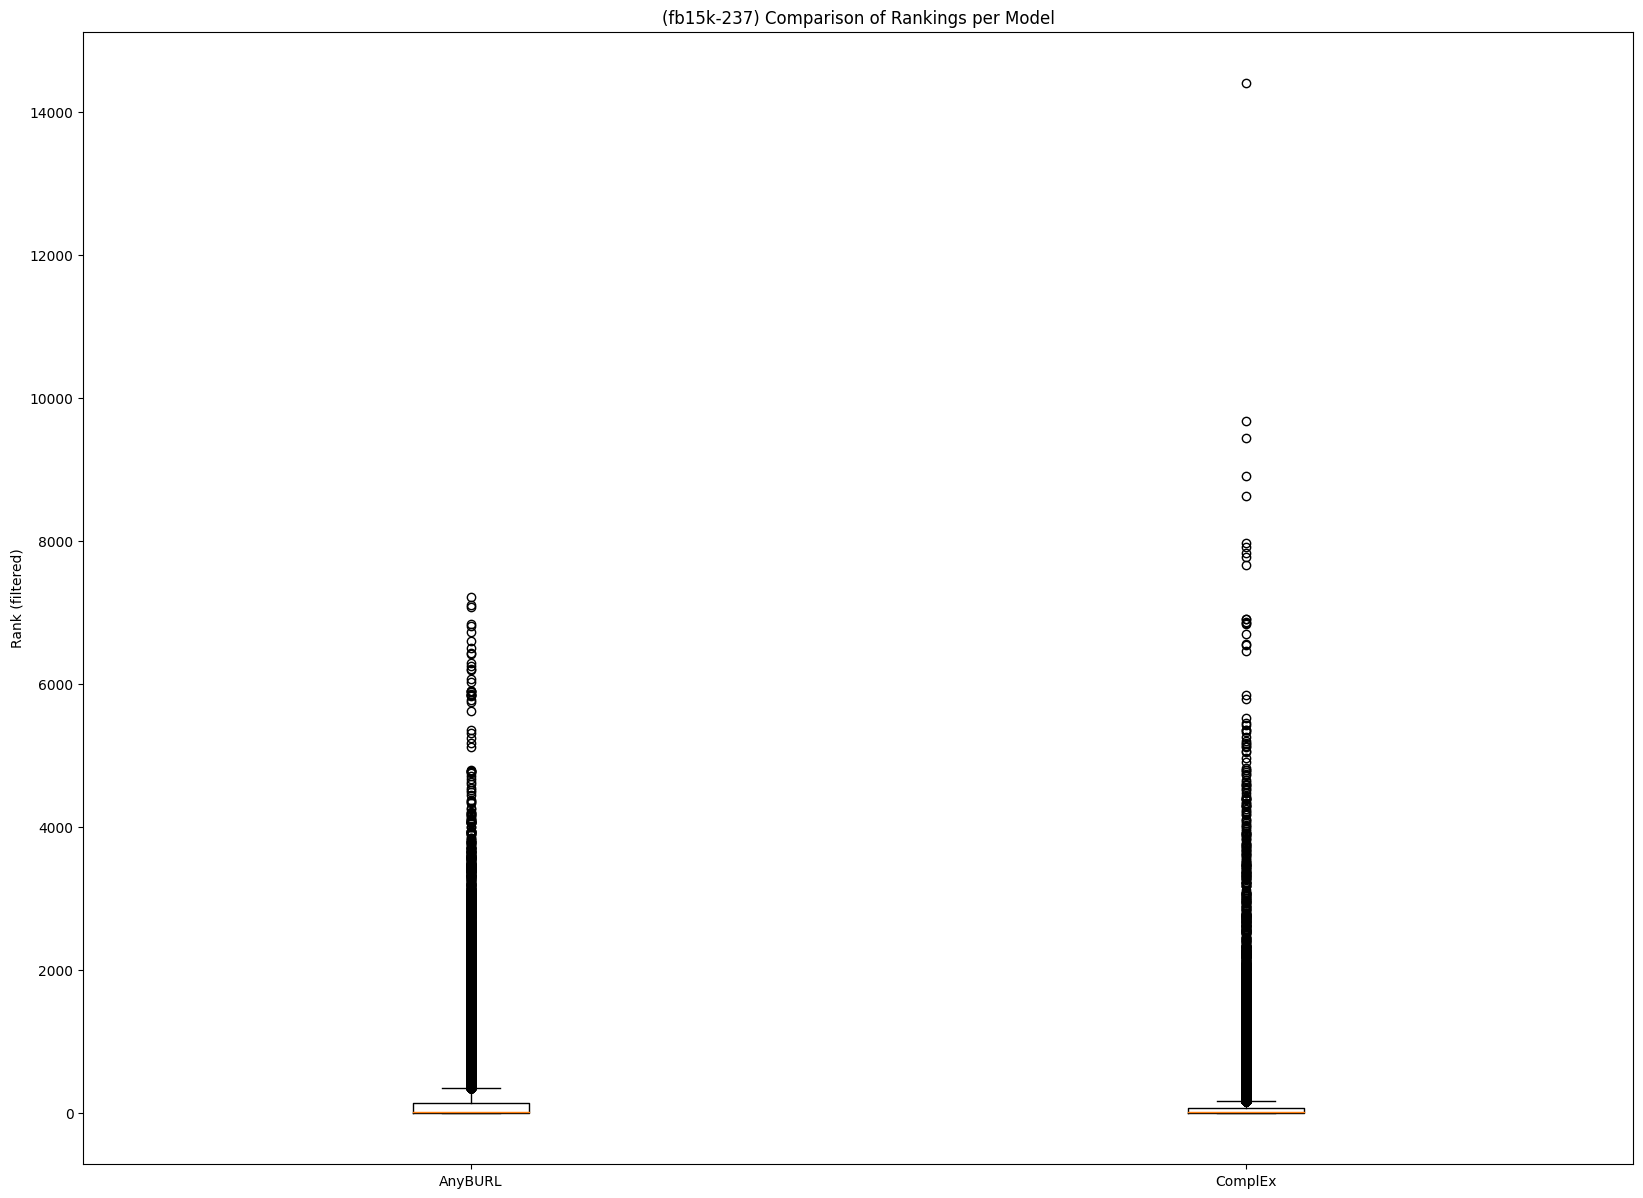

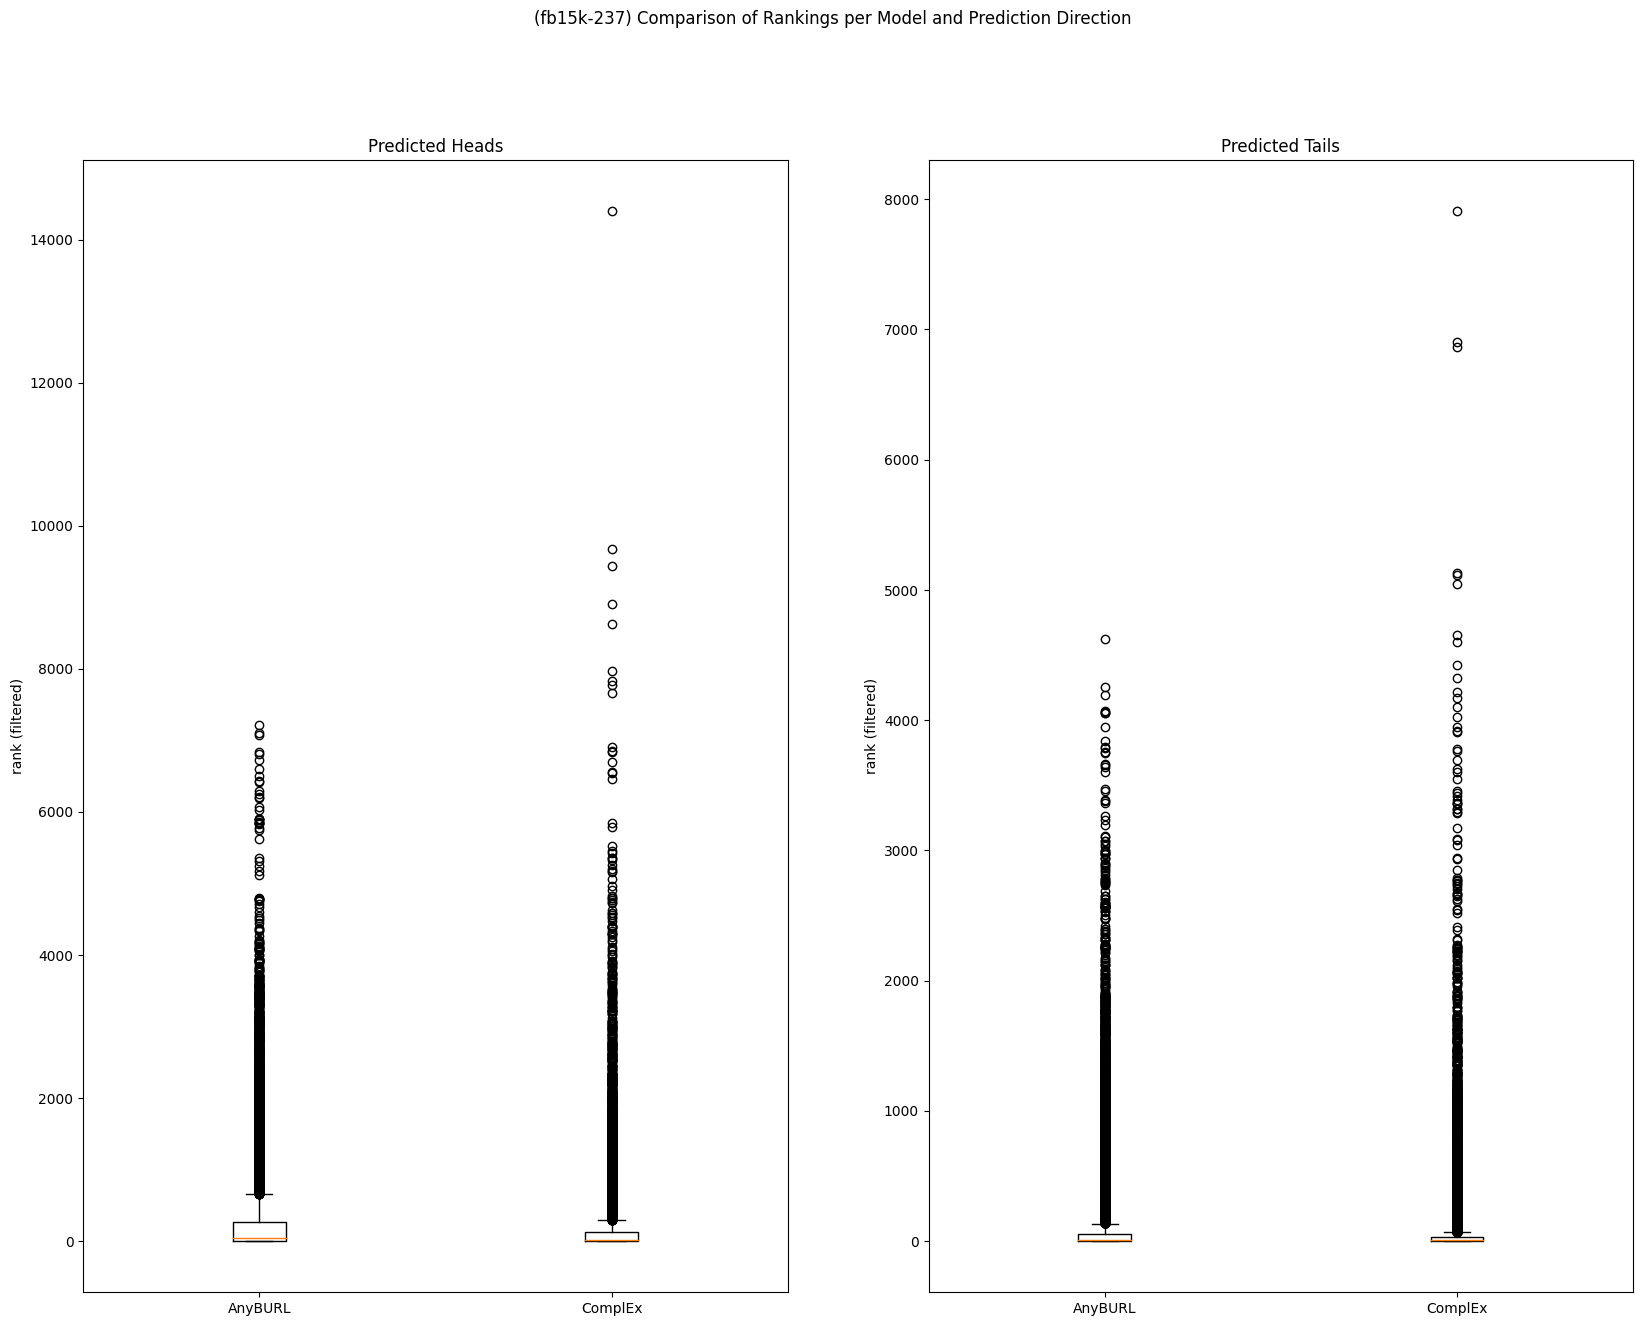

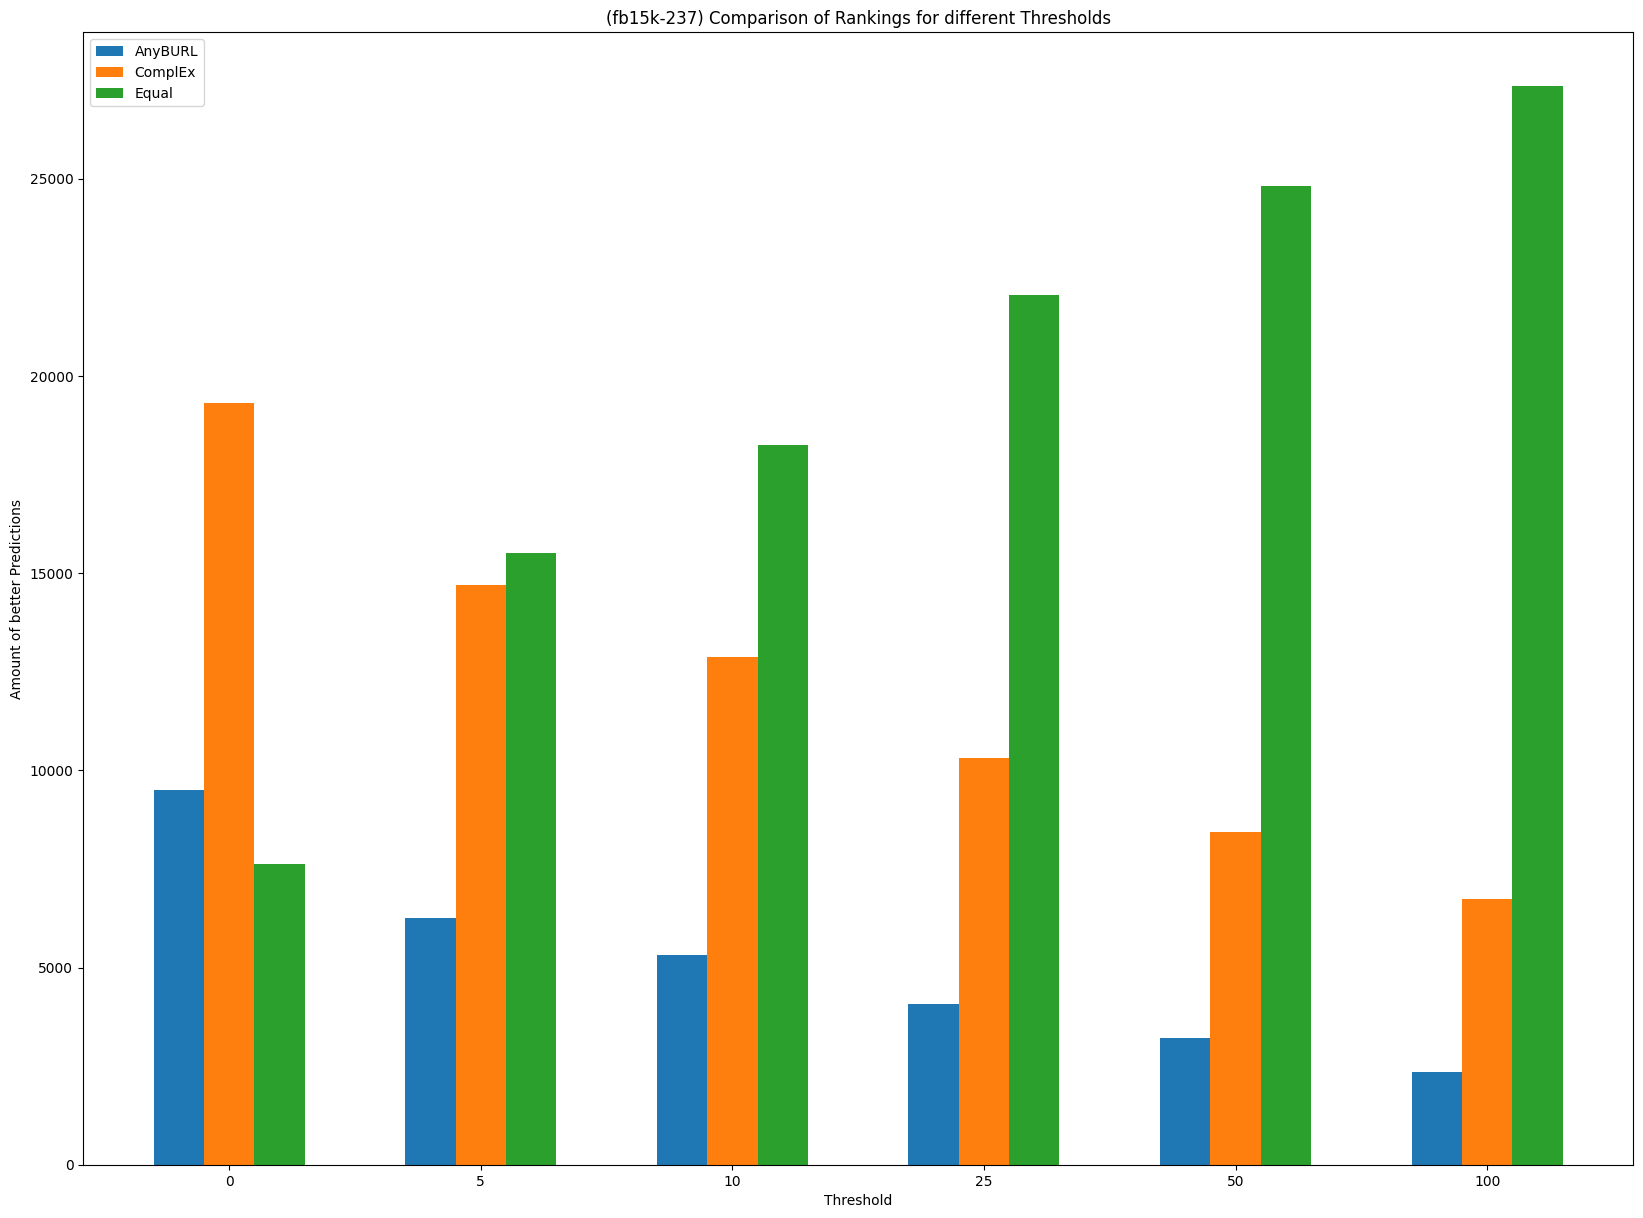

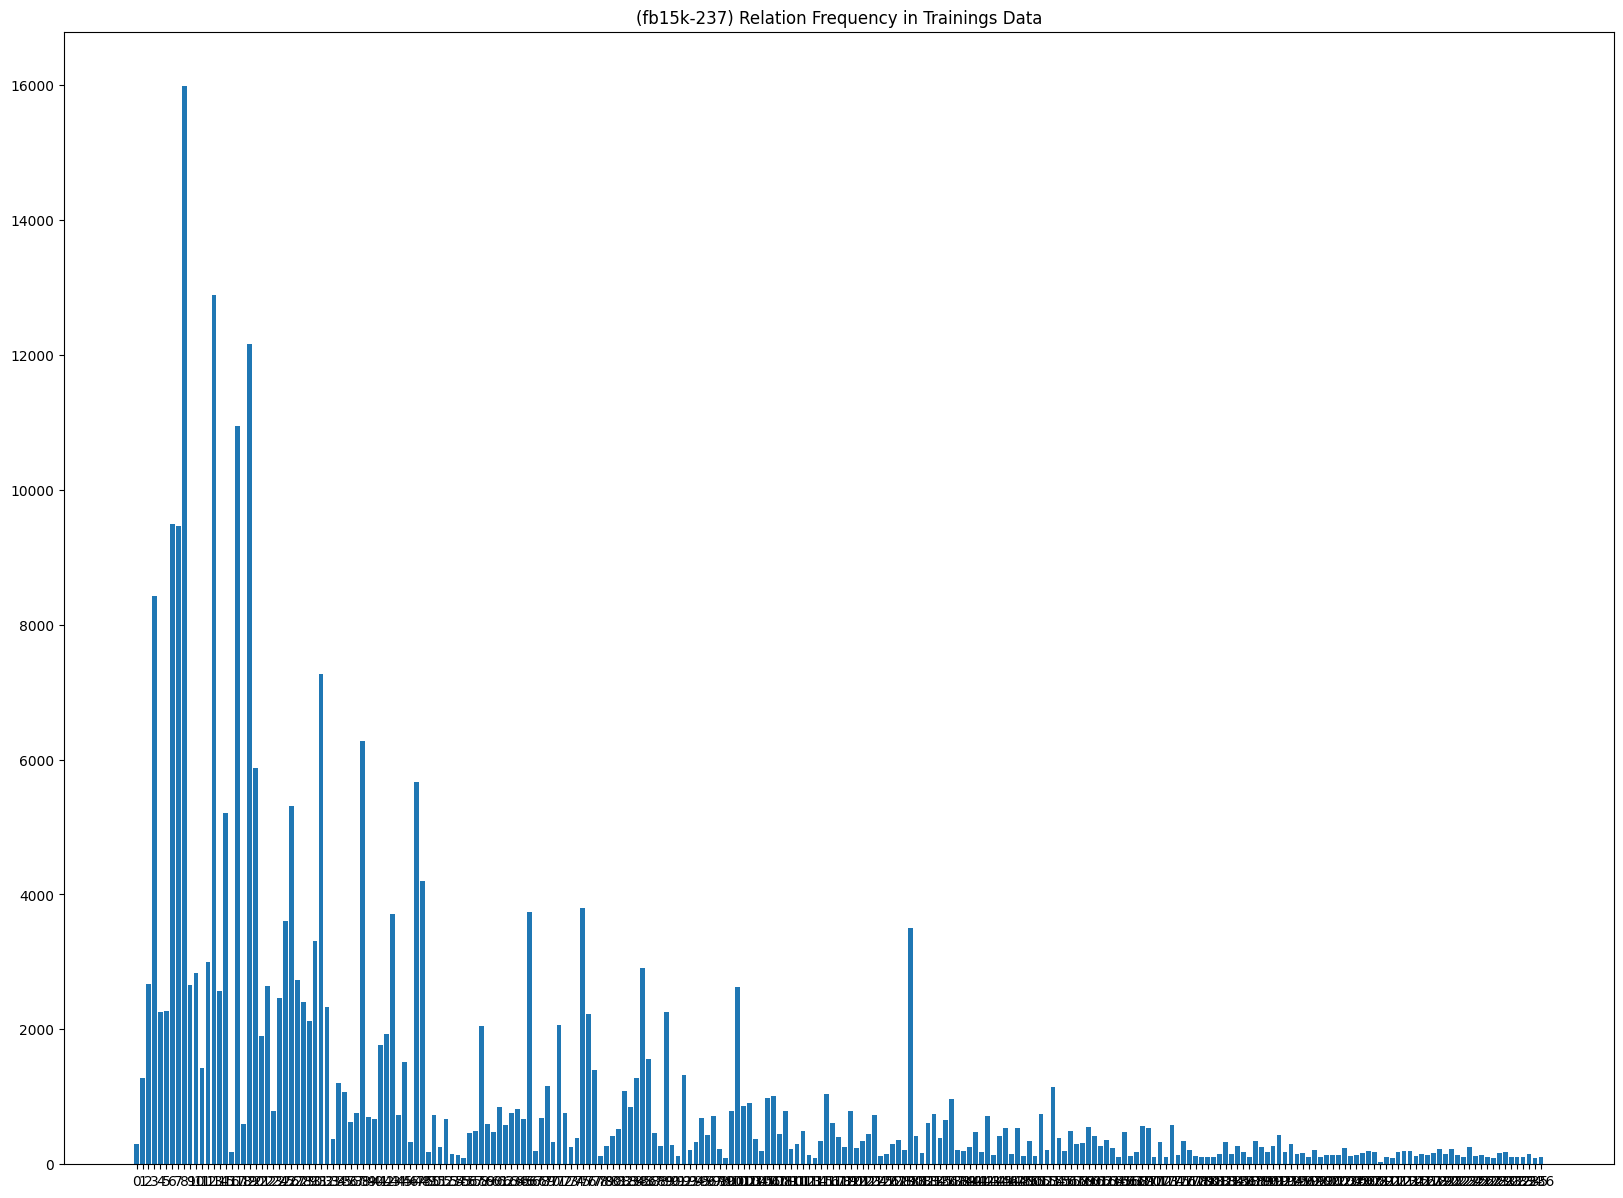

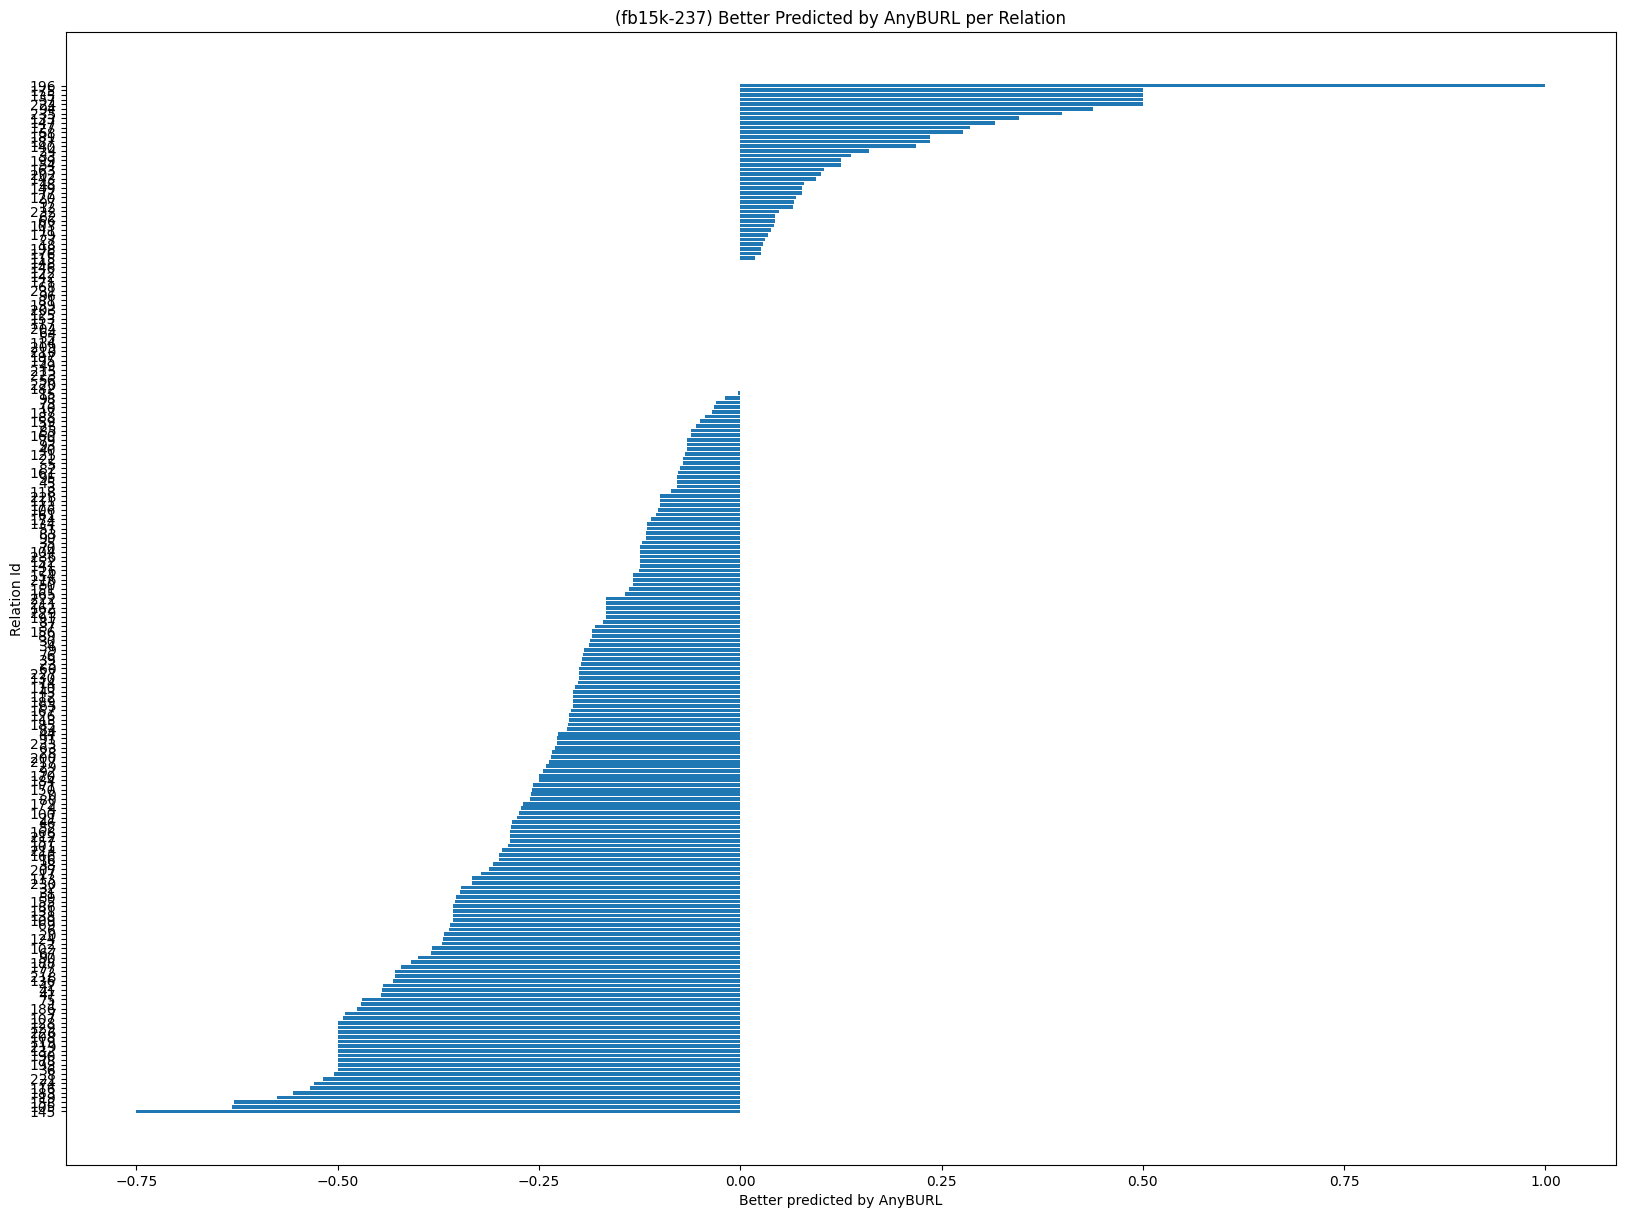

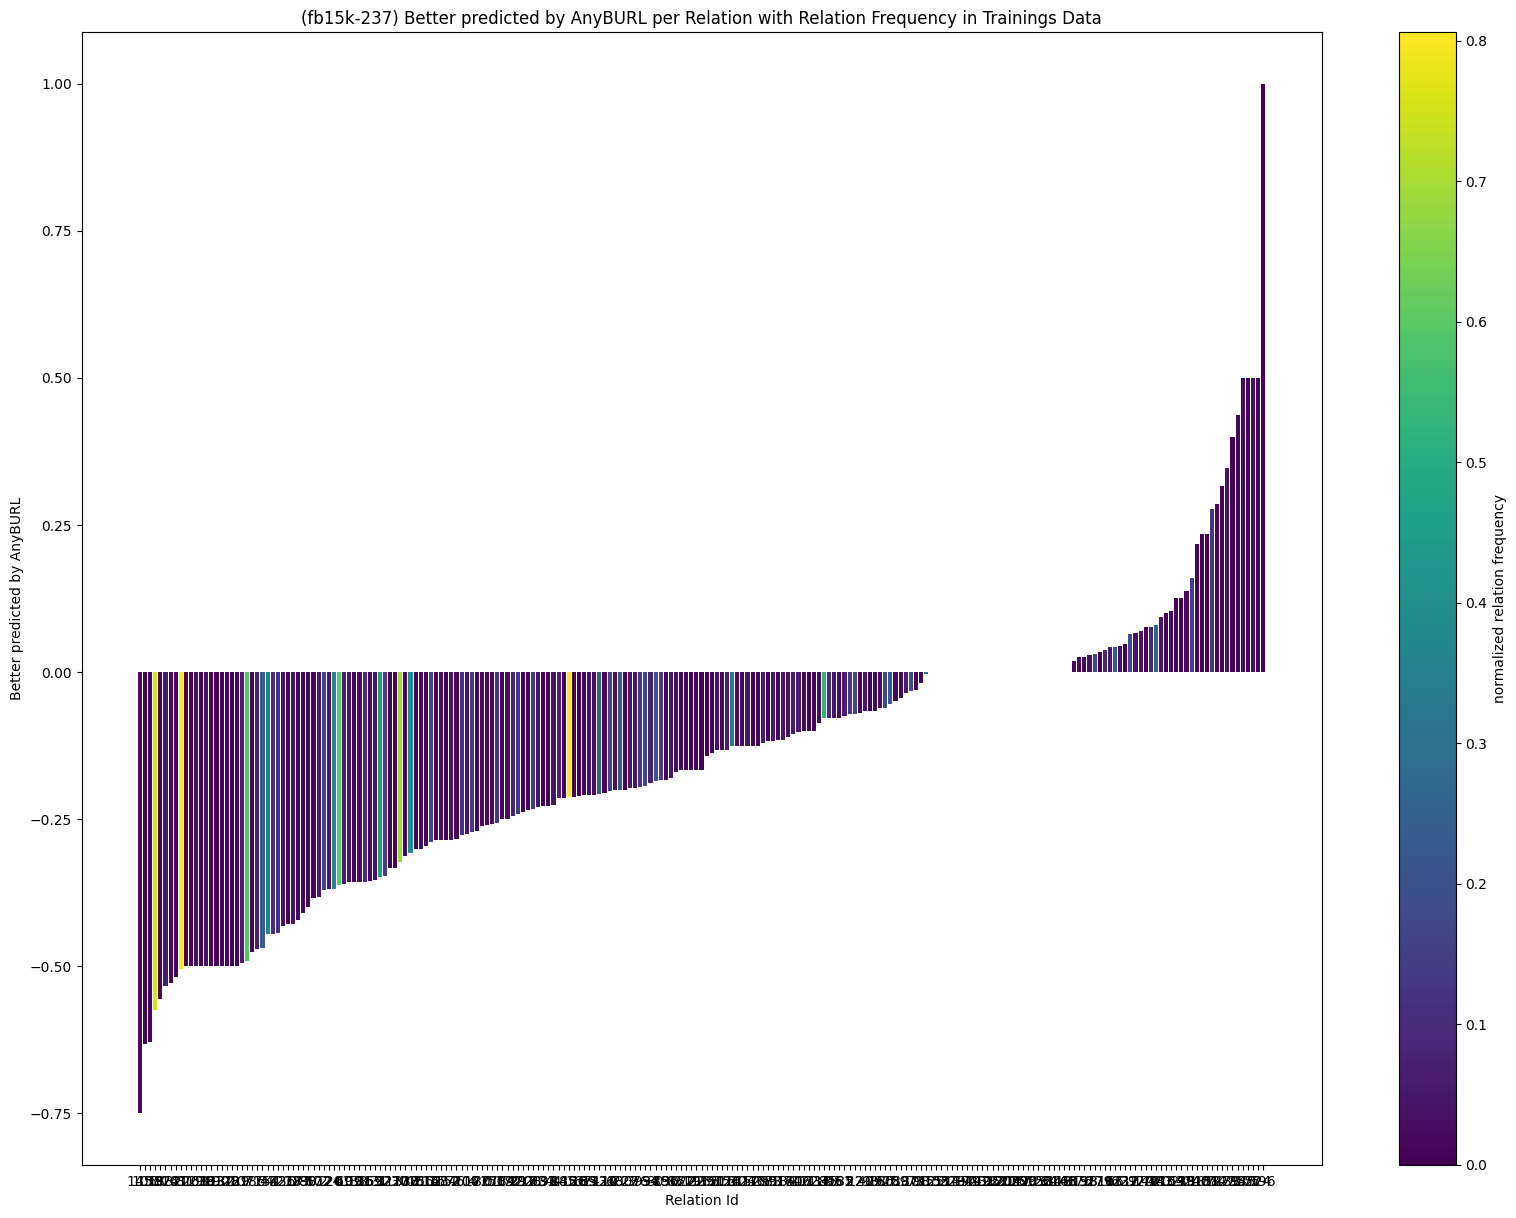

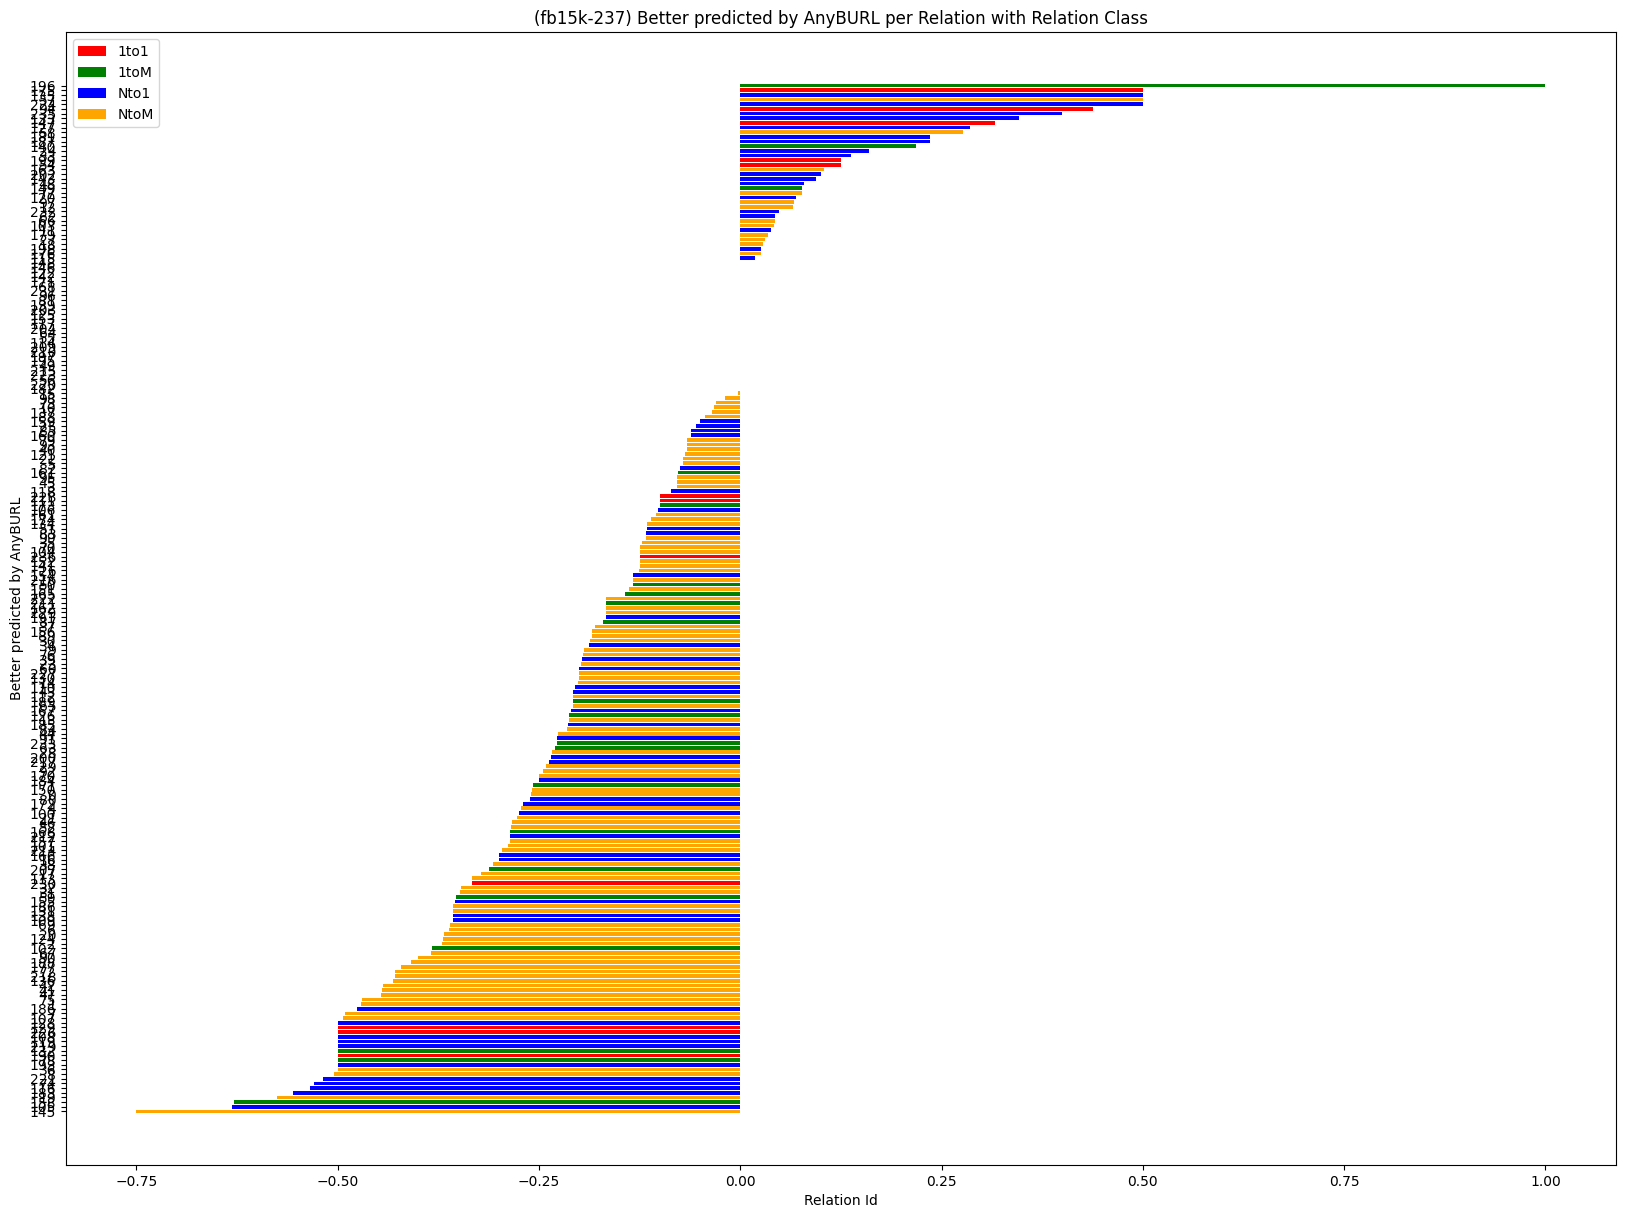

Working on wn18 - AnyBURL - ComplEx


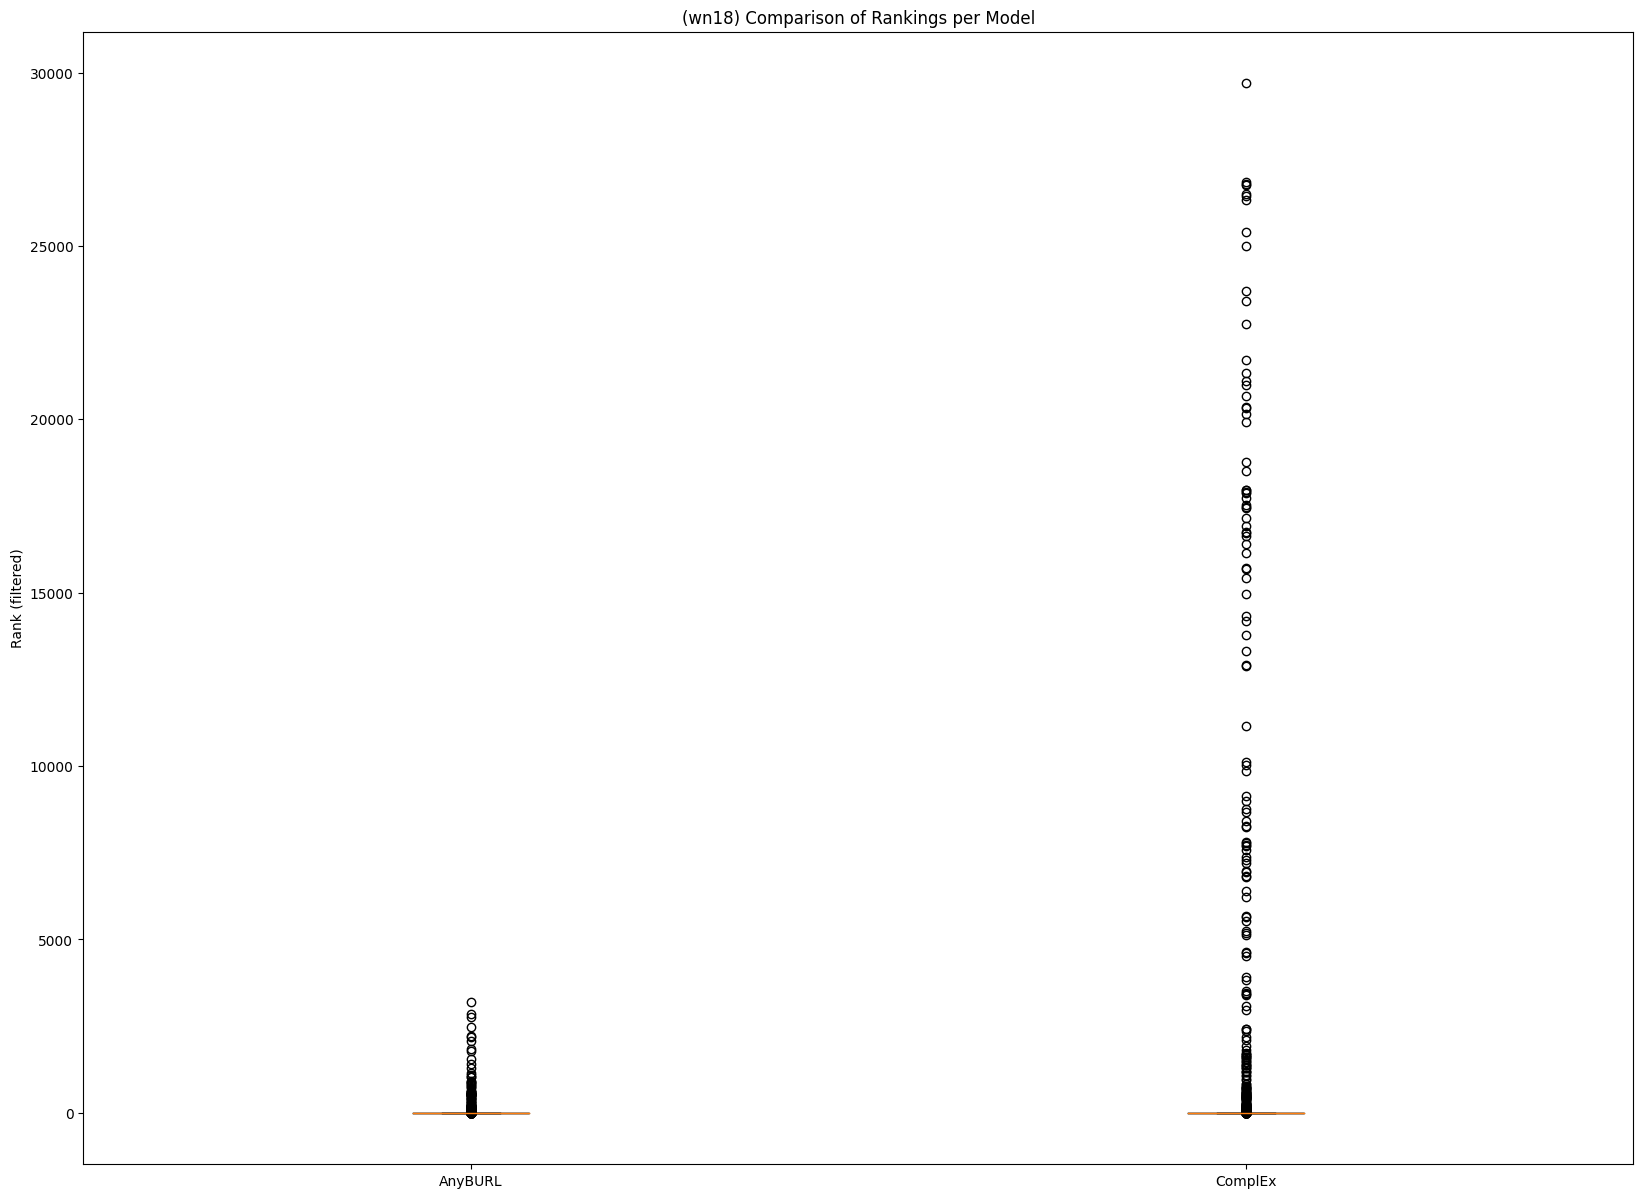

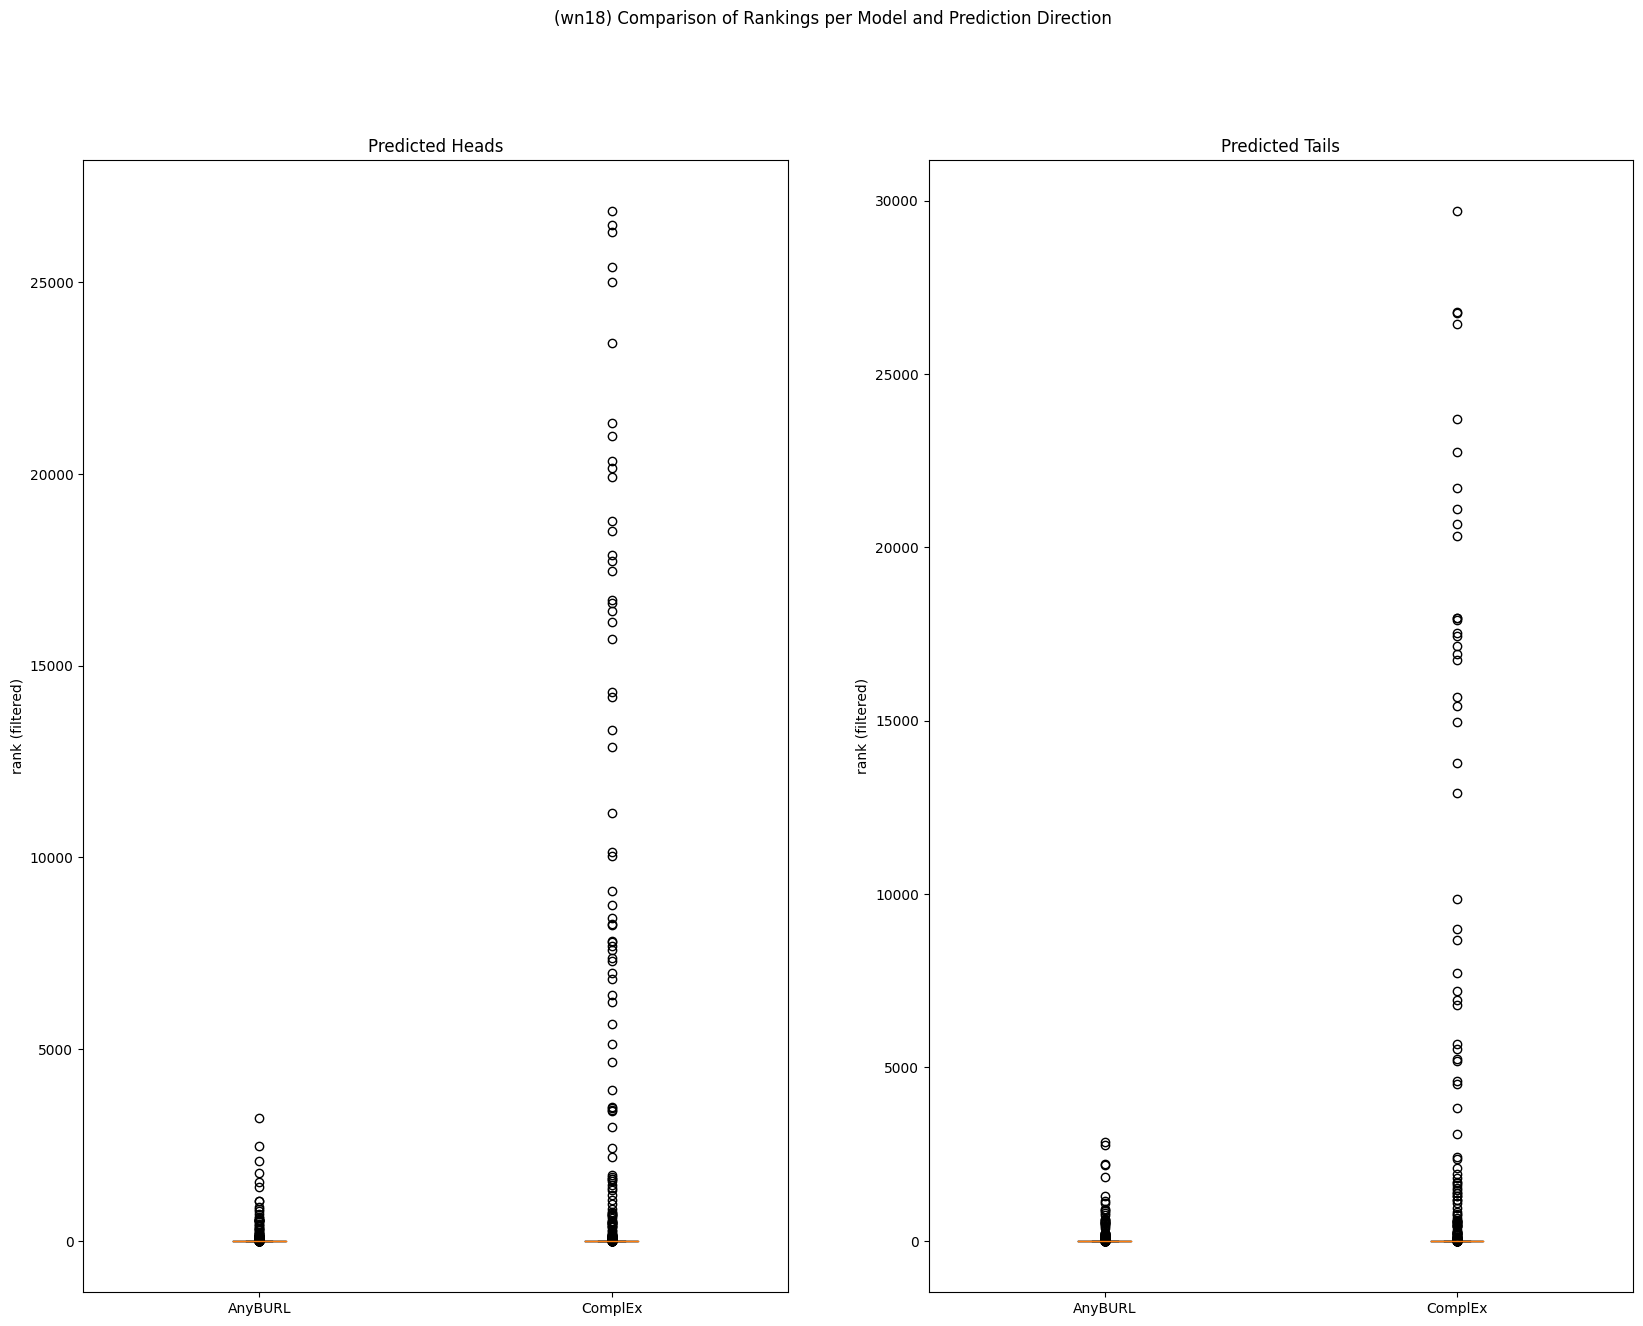

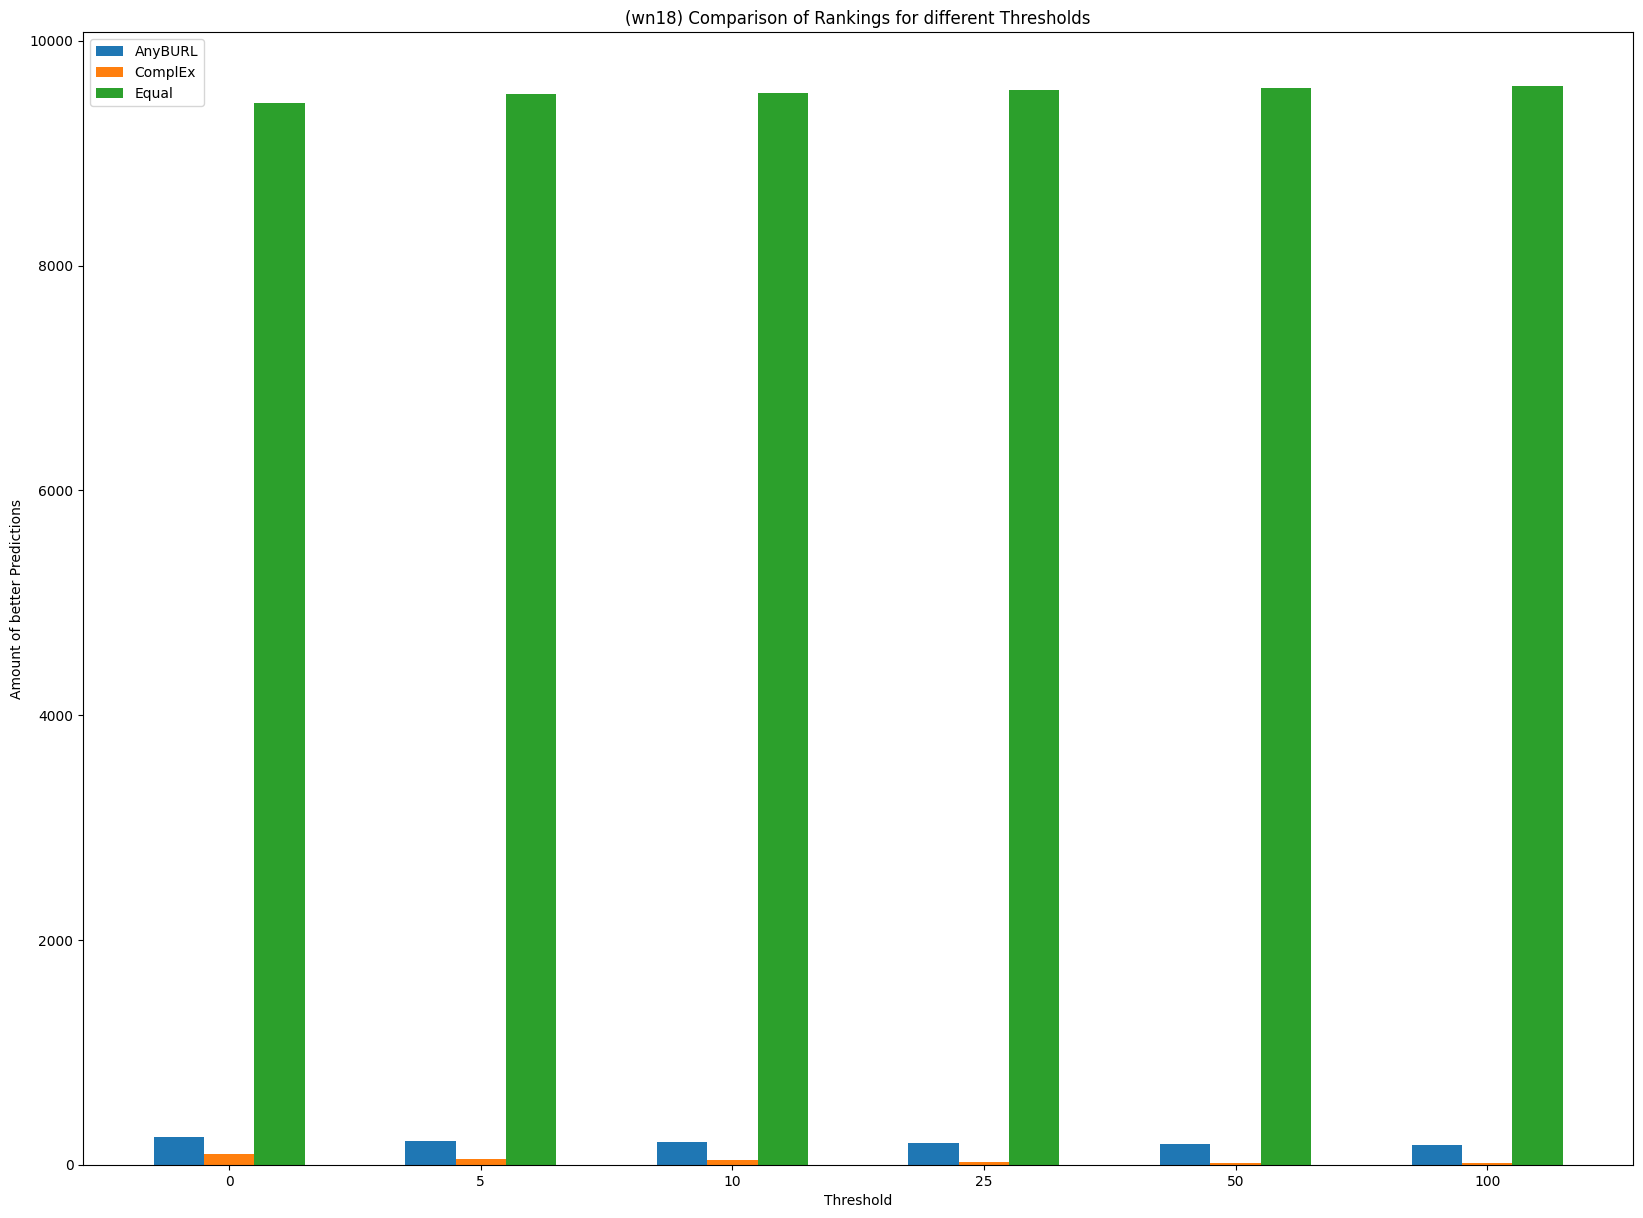

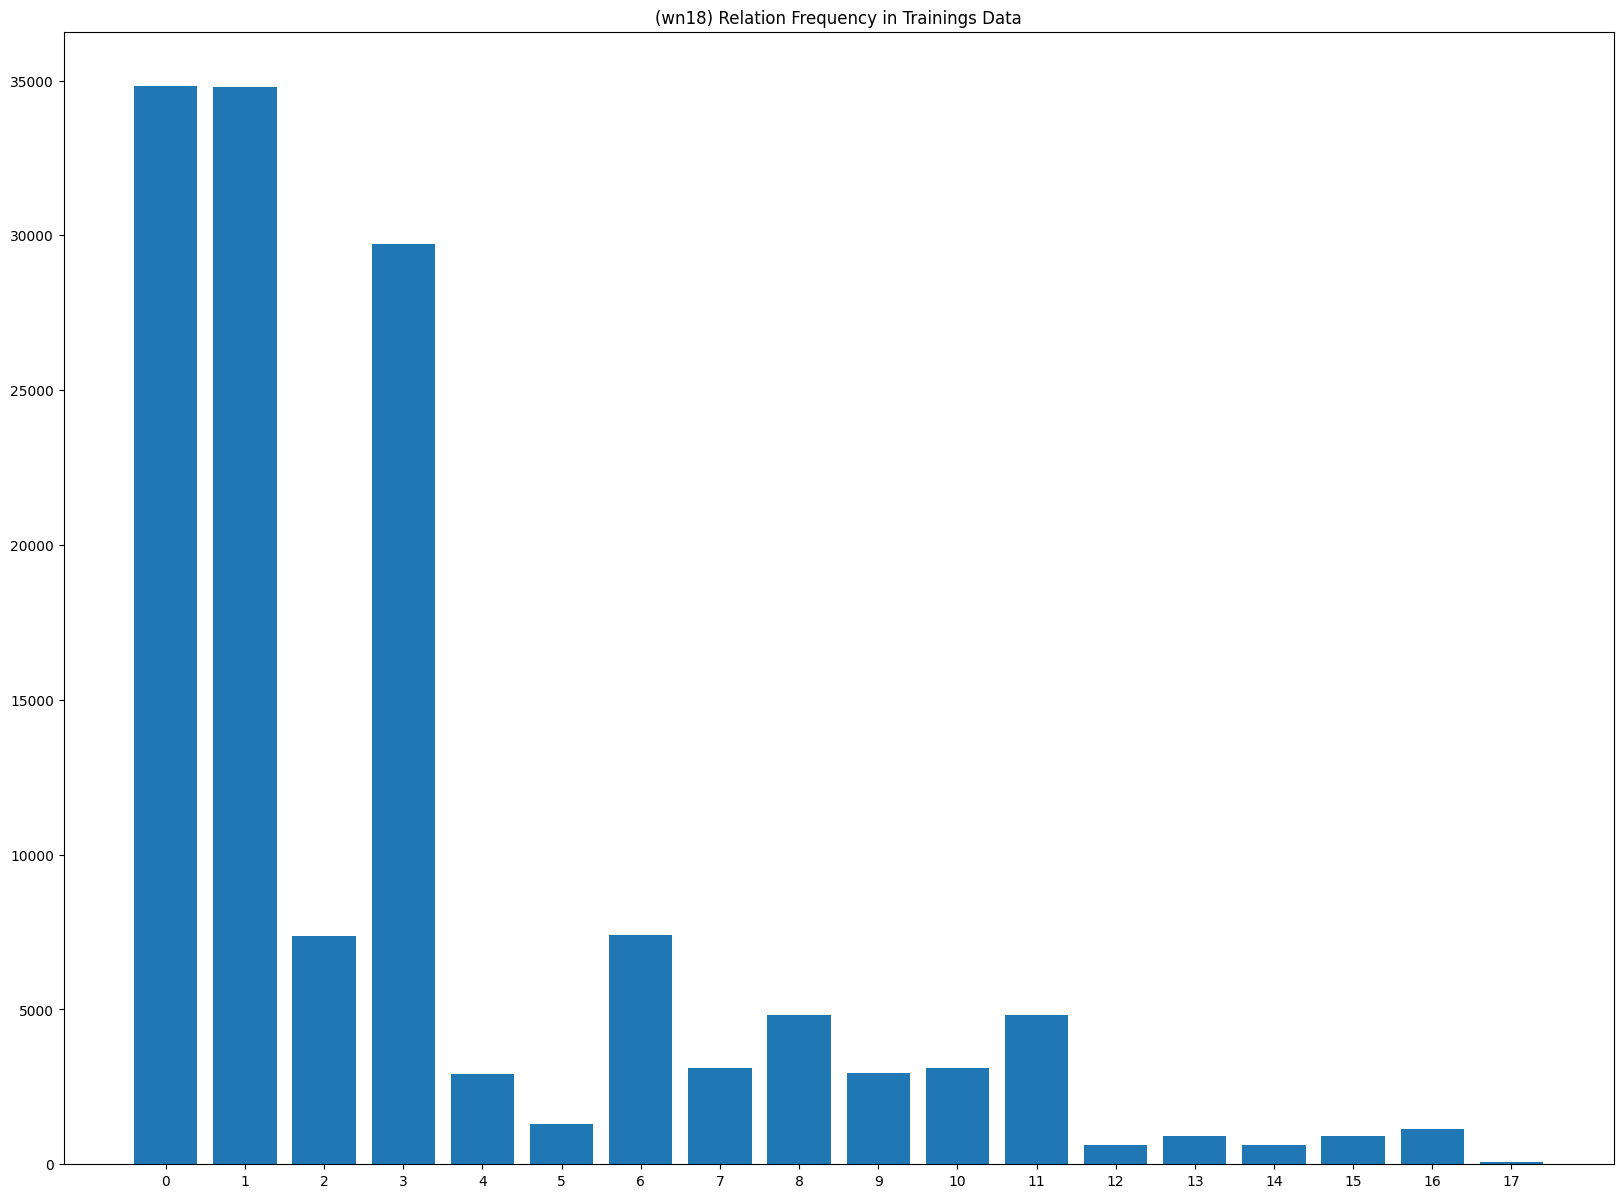

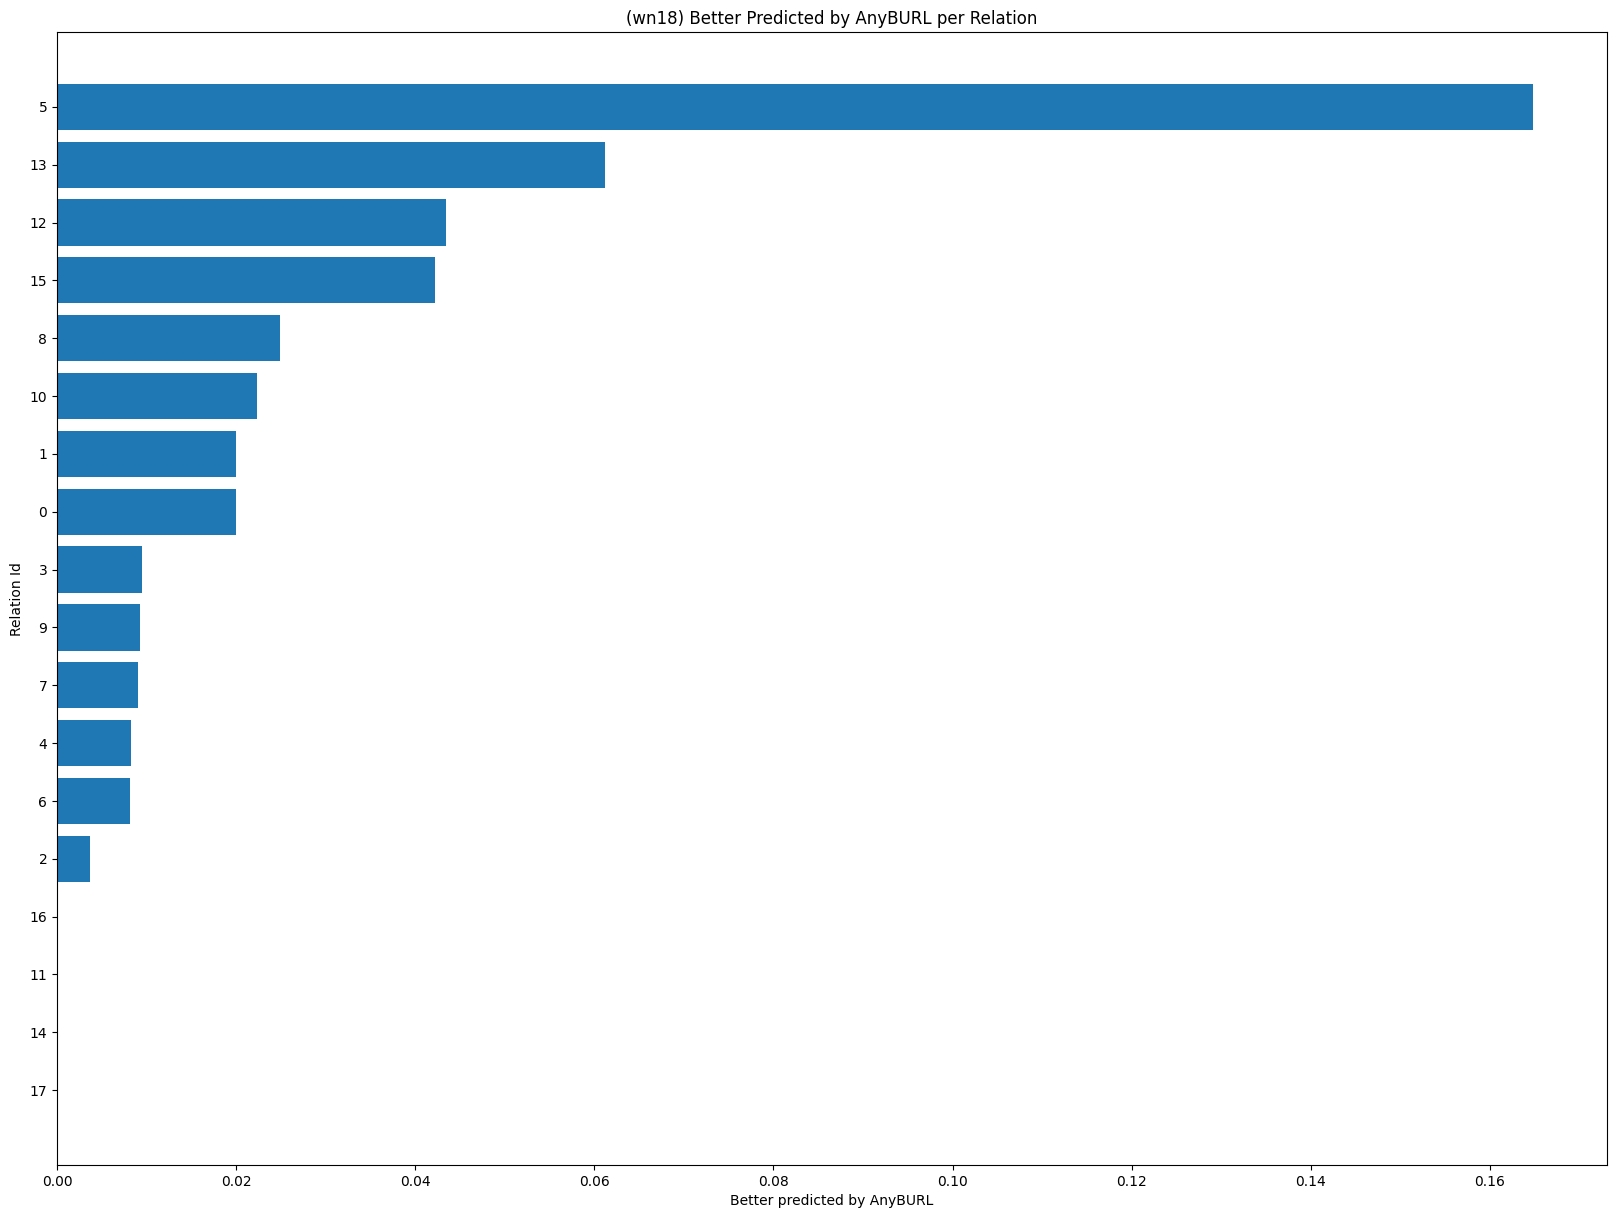

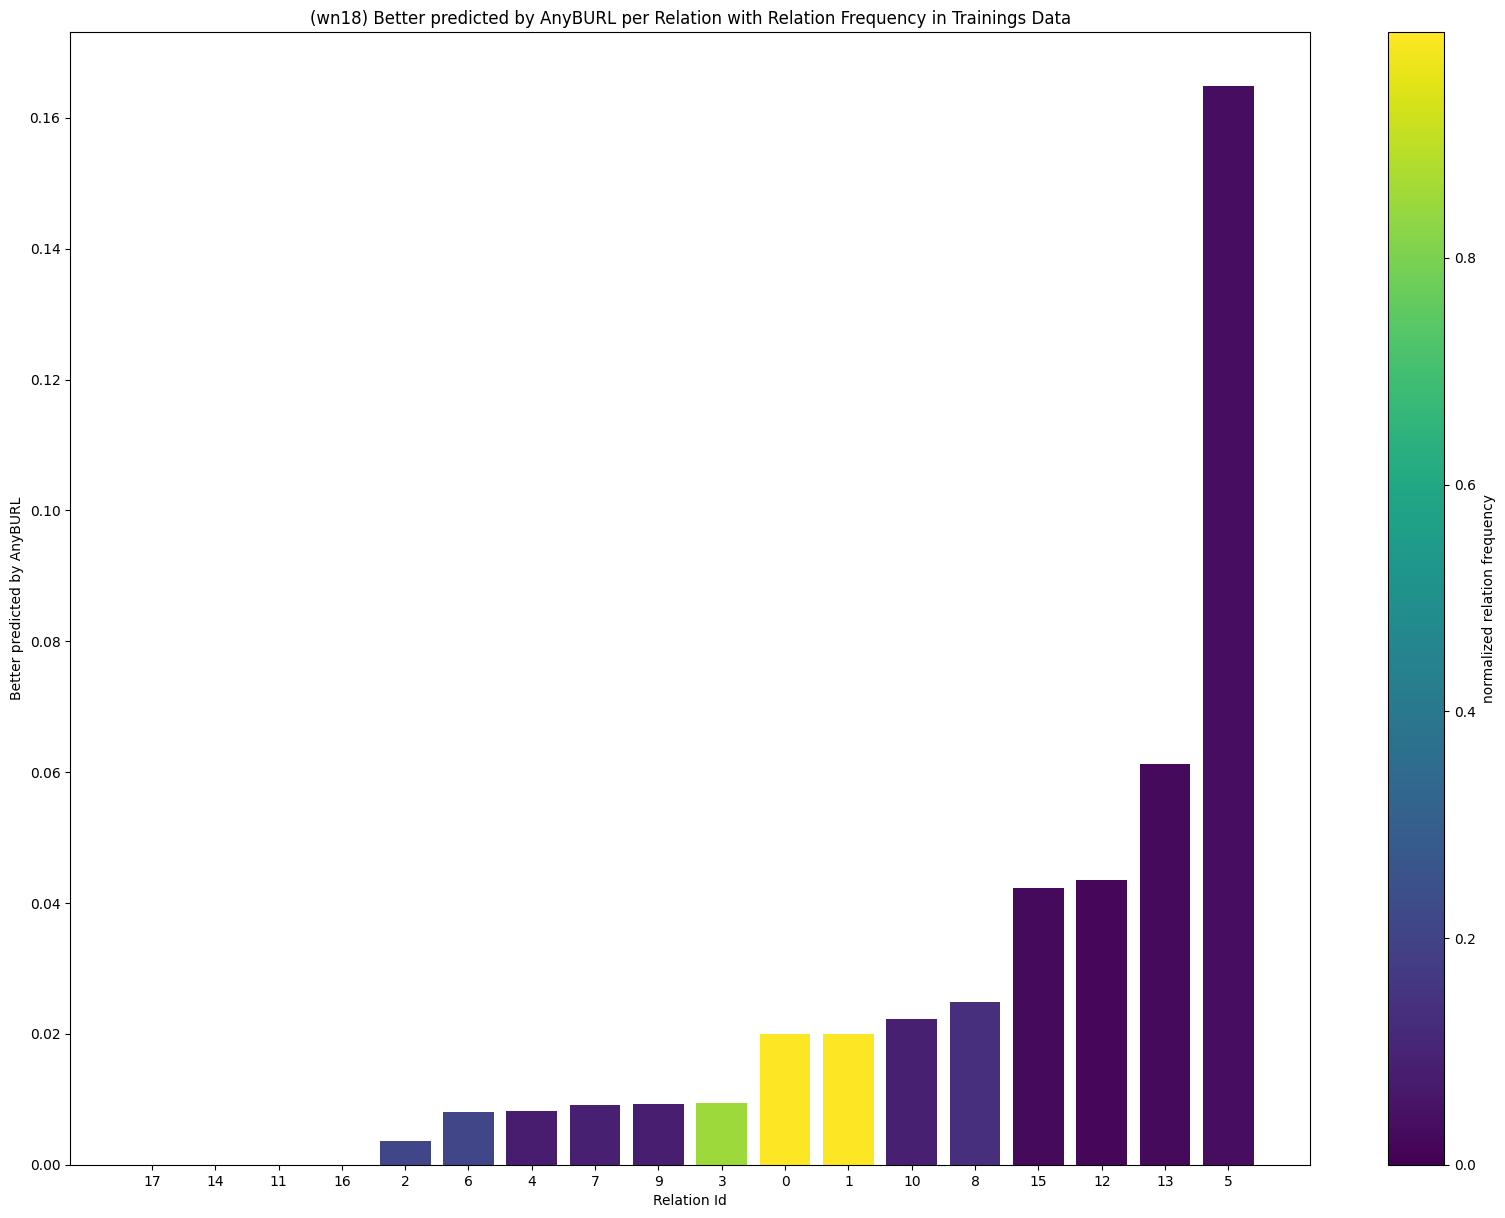

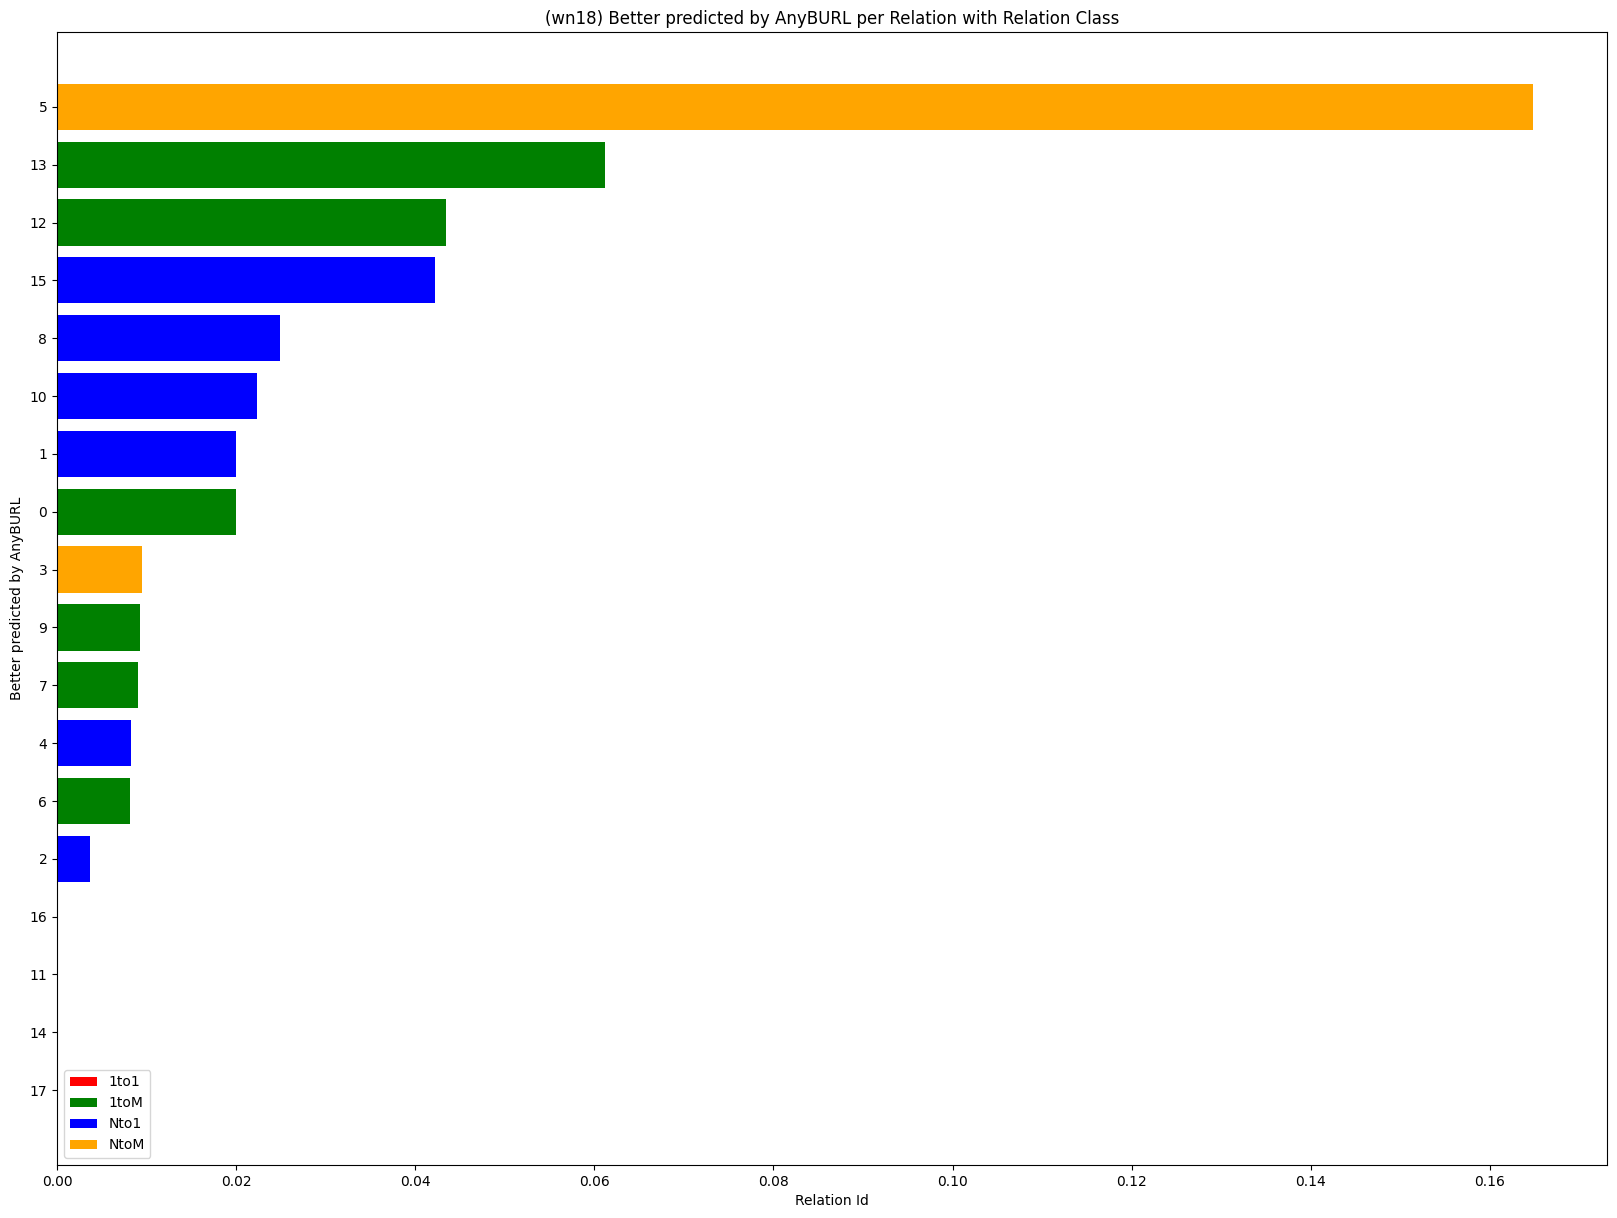

In [4]:
for dataset_name in datasets:
    for (symbolic, symbolic_name) in symbolic_models:
        for (subsymbolic, subsymbolic_name) in subsymbolic_models:
            print(f'Working on {dataset_name} - {symbolic_name} - {subsymbolic_name}')
            df = get_prediction_data(dataset_name, symbolic, subsymbolic)
            df = df[['h_id', 'r_id', 't_id', 'predicted_head', 'rank_filtered_anyburl', 'rank_filtered_kge']]
            df = df.dropna()
            pdf = PdfPages(f'analysis_for_{get_formatted_data_name(dataset_name, symbolic, subsymbolic)[0:-4]}.pdf')
            show_all_graphs(df, dataset_name, bp_threshold, relation_class_threshold)
            pdf.close()